## Problem Statement

### Task 1:-Prepare a complete data analysis report on the given data.

### Task 2:-Create a predictive model which will help the bank to identify which customer will make transactions in future.


# START <BR>

**ProjectID:- PRCP-1020-HousePricePred**<br>

## Import libraries

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport

import warnings
warnings.filterwarnings("ignore")

In [5]:
data=pd.read_csv("train(1).csv")

##### In summary, performing basic checks before executing code is a vital practice in software development and data science. It ensures that the program runs smoothly, avoids errors, enhances stability, improves performance, and provides a better user experience. These checks help identify potential issues early, making the code more reliable, maintainable, and secure.

# Basic checks

In [6]:
data.head(5)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [36]:
data.tail(5)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001
199999,train_199999,0,10.8762,-5.7105,12.1183,8.0328,11.5577,0.3488,5.2839,15.2058,...,8.9842,1.6893,0.1276,0.3766,15.2101,-2.4907,-2.2342,8.1857,12.1284,0.1385


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [38]:
data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [39]:
data.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

In [40]:
data.dtypes

ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 202, dtype: object

# EDA

## Why EDA (Exploratory Data Analysis) is Important 
#### Exploratory Data Analysis (EDA) is one of the most important steps and the first step in a data science workflow. The process of EDA involves checking and visualizing the data so that its structure can be understood, patterns discovered, anomalies identified, and all this information can be obtained.

#### EDA helps you better understand your data: It uncovers hidden insights, identifies patterns, anomalies, and structures that can guide further analysis.
#### Prepares the data to be modeled: Through cleaning and transforming the data according to what you now know from EDA, you prepare your dataset in a manner that best enhances the model's performance.
#### Ensures quality and accuracy in modeling: Proper handling of missing data, outliers, and noise along with visualization of relationships between variables gives EDA a strong foundation for building accurate and reliable machine learning models.

In [41]:
!pip install --upgrade ydata-profiling

In [42]:
from ydata_profiling import ProfileReport

# Sample a smaller portion if dataset is large
data = data.sample(n=10000)  # For example, use 10,000 rows for profiling

# Generate the profile report with minimal features to avoid memory overload
profile = ProfileReport(data, title="Data Profiling Report", minimal=True)

# Save the report to a file
profile.to_file("data_profile_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Check the Null Values

In [7]:
data.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

In [13]:
# Load the dataset
file_path = 'train(1).csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Filter rows with NaN values
rows_with_nan = data[data.isnull().any(axis=1)]
print("Rows with NaN values:")
print(rows_with_nan)

# Filter columns with any NaN values
columns_with_nan = data.loc[:, data.isnull().any()]
print("\nColumns with NaN values:")
print(columns_with_nan)

# Total number of NaN values in the dataset
total_nan = data.isnull().sum().sum()
print(f"\nTotal number of NaN values in the dataset: {total_nan}")


Rows with NaN values:
Empty DataFrame
Columns: [ID_code, target, var_0, var_1, var_2, var_3, var_4, var_5, var_6, var_7, var_8, var_9, var_10, var_11, var_12, var_13, var_14, var_15, var_16, var_17, var_18, var_19, var_20, var_21, var_22, var_23, var_24, var_25, var_26, var_27, var_28, var_29, var_30, var_31, var_32, var_33, var_34, var_35, var_36, var_37, var_38, var_39, var_40, var_41, var_42, var_43, var_44, var_45, var_46, var_47, var_48, var_49, var_50, var_51, var_52, var_53, var_54, var_55, var_56, var_57, var_58, var_59, var_60, var_61, var_62, var_63, var_64, var_65, var_66, var_67, var_68, var_69, var_70, var_71, var_72, var_73, var_74, var_75, var_76, var_77, var_78, var_79, var_80, var_81, var_82, var_83, var_84, var_85, var_86, var_87, var_88, var_89, var_90, var_91, var_92, var_93, var_94, var_95, var_96, var_97, ...]
Index: []

[0 rows x 202 columns]

Columns with NaN values:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17

In [14]:
# Load the dataset
file_path = 'train(1).csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Select categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:")
print(categorical_columns)


Categorical Columns:
Index(['ID_code'], dtype='object')


### Why We Clean Boxplot Outliers:
#### Improves model performance: Outliers can distort model predictions, cause overfitting, and slow down the convergence of algorithms.
Provides clearer insights: Cleaning outliers makes visualizations more meaningful, representing the majority of data more accurately.
Ensures better statistical analysis: Outliers can violate assumptions for statistical tests, leading to inaccurate conclusions.
Normalizes data distributions: Outliers can make the data highly skewed, making it less representative of typical cases. Cleaning them helps achieve a normal distribution, which is preferred by many models.
Corrects data entry errors: Sometimes, outliers are simply mistakes, and removing them ensures the dataset is clean and accurate.
#### When Should You Not Remove Outliers?
While cleaning outliers is often beneficial, there are cases where outliers should not be removed:

Important rare events: If the outliers represent important rare events (e.g., fraud detection, medical diagnoses), removing them might cause you to lose valuable insights.
Robust models: Some models (like decision trees, random forests, and gradient boosting machines) are more robust to outliers and can handle them well without degradation in performance.
#### IQR Formula for Outliers:
First Quartile (Q1): The 25th percentile of the data (i.e., the median of the lower half of the data).

Third Quartile (Q3): The 75th percentile of the data (i.e., the median of the upper half of the data).

IQR (Interquartile Range): The difference between the third and first quartiles:

IQR=Q3−Q1
Outlier Thresholds: The typical rule for identifying outliers is:

Lower Bound = Q1−1.5×IQR
Upper Bound = Q3+1.5×IQR
Any data points that fall below the lower bound or above the upper bound are considered outliers.

Outliers are any data points that fall outside the range [Q1−1.5×IQR,Q3+1.5×IQR].

<Axes: xlabel='var_0'>

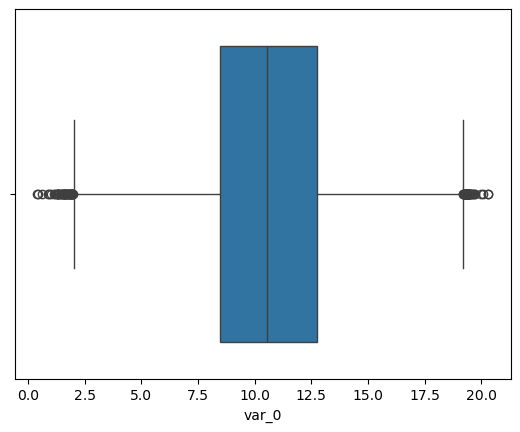

In [15]:
sns.boxplot(x='var_0',data=data)

## Check Outliers For Numerical Numbers

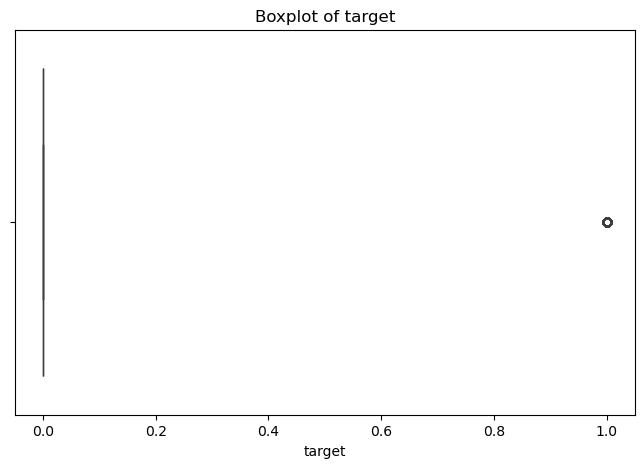

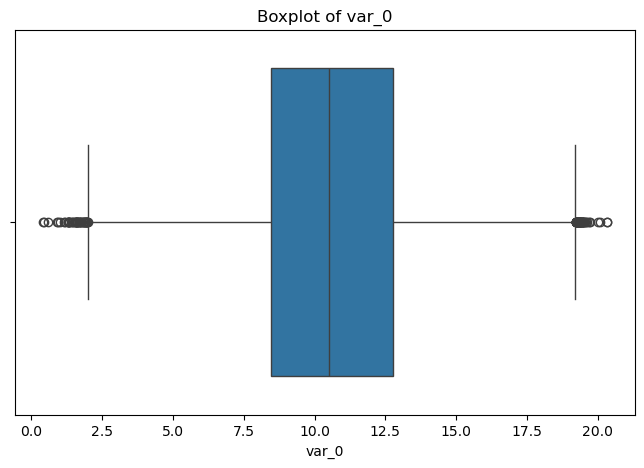

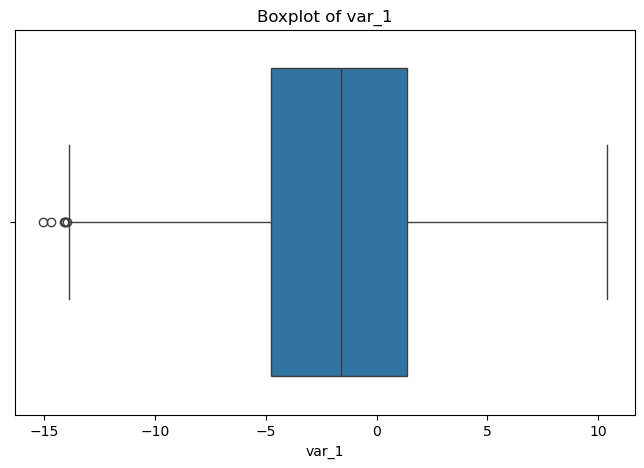

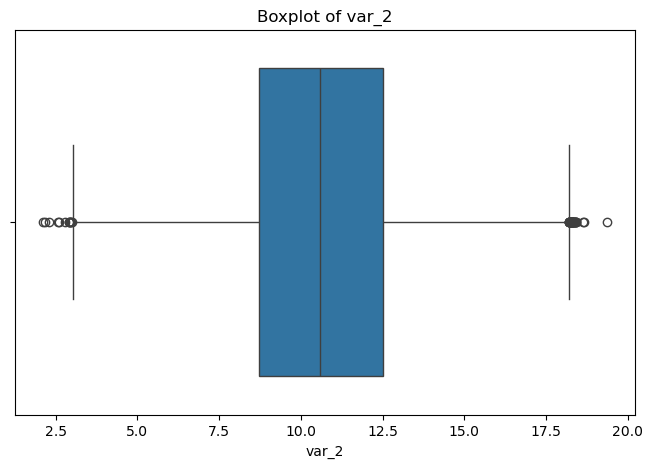

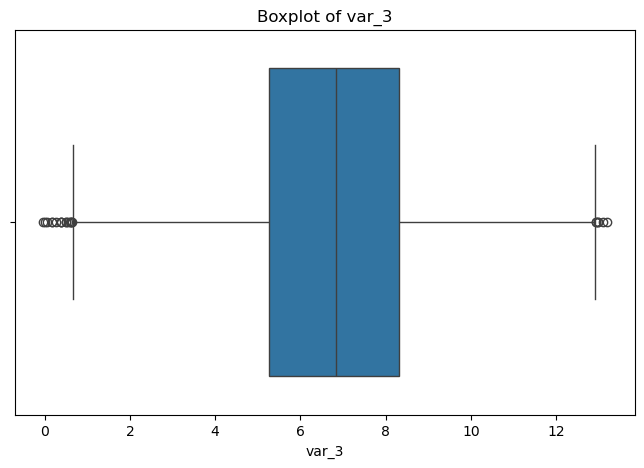

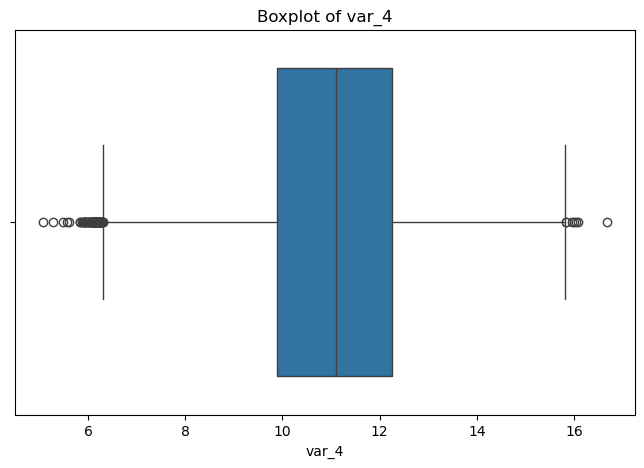

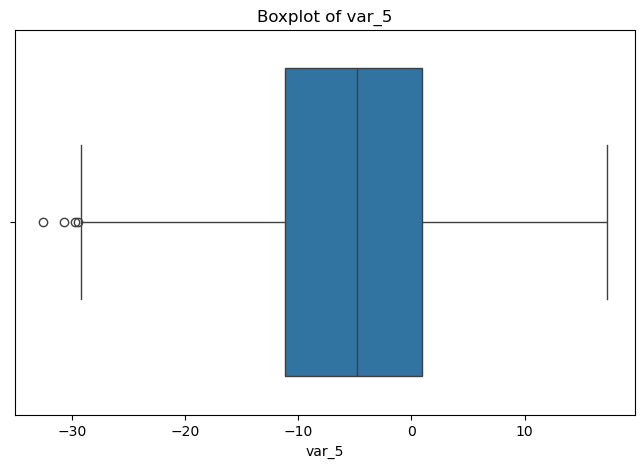

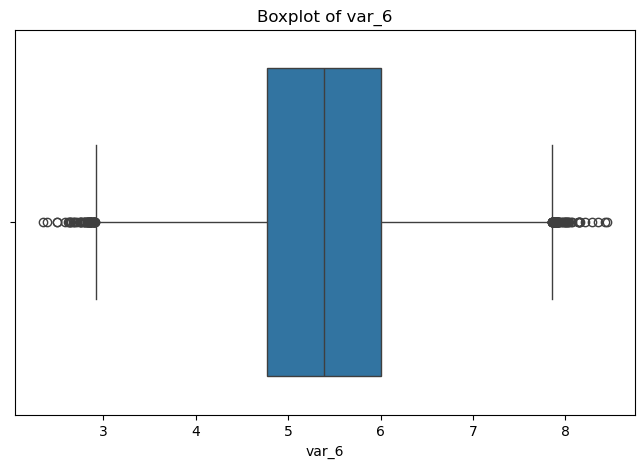

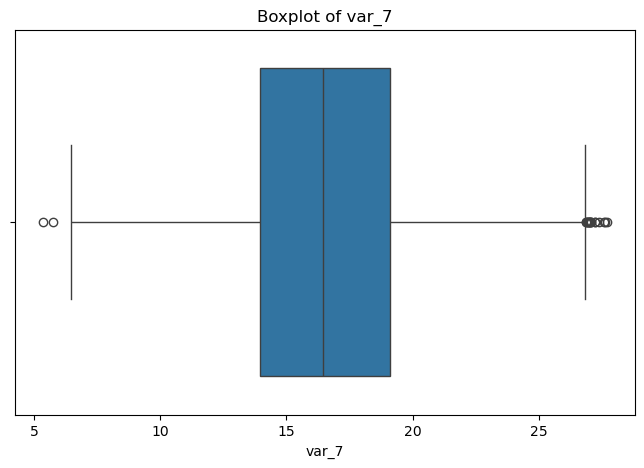

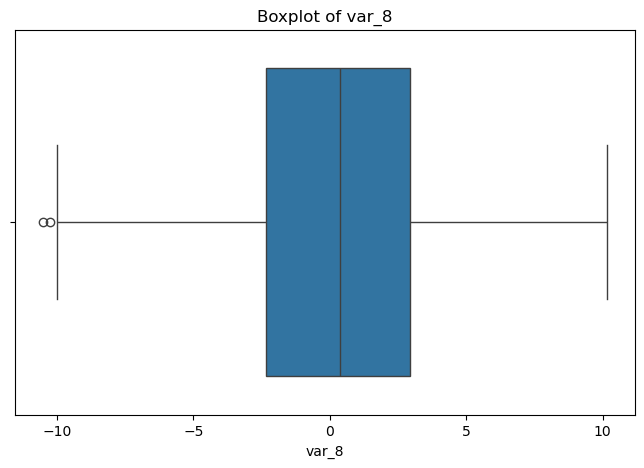

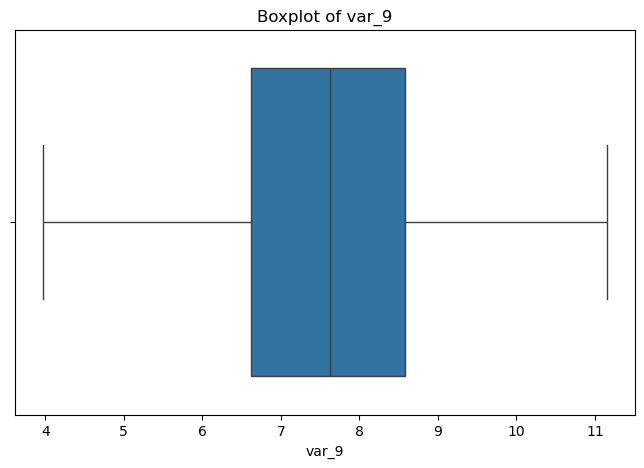

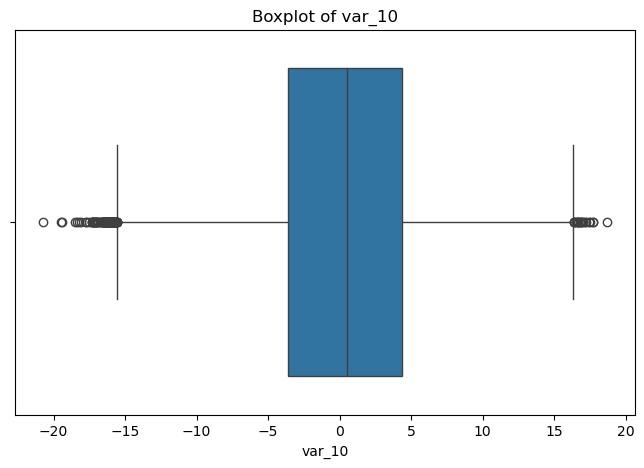

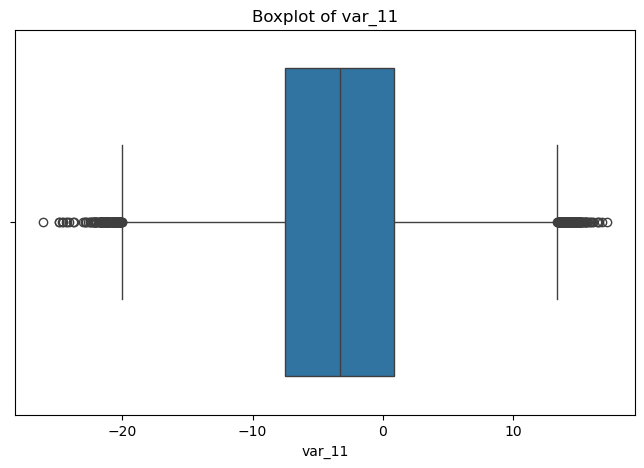

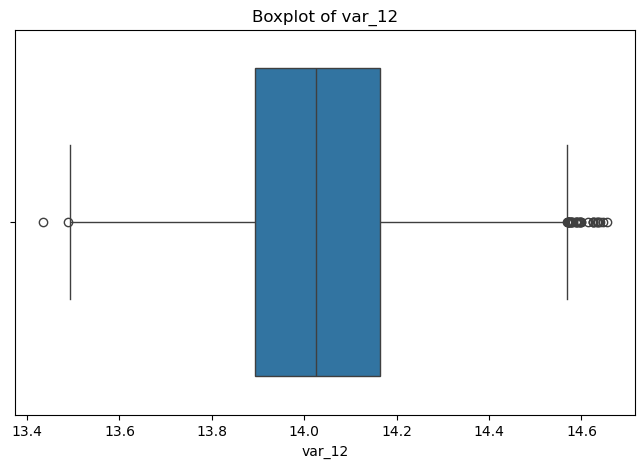

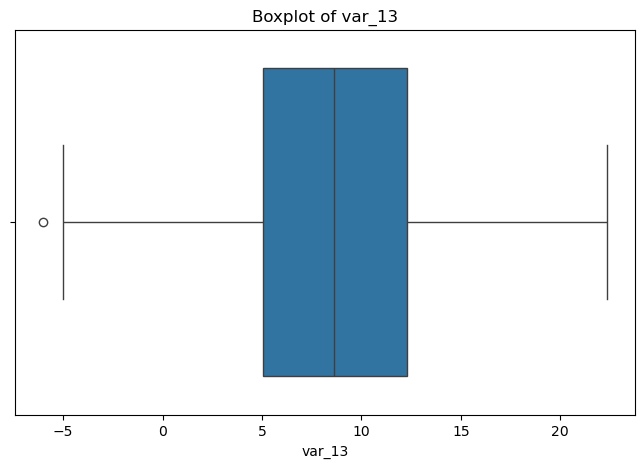

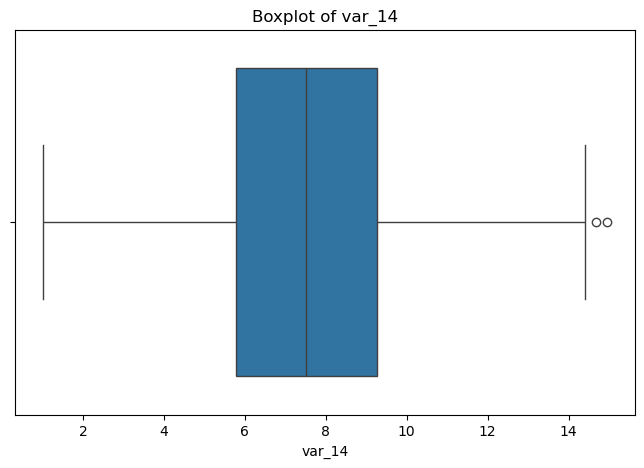

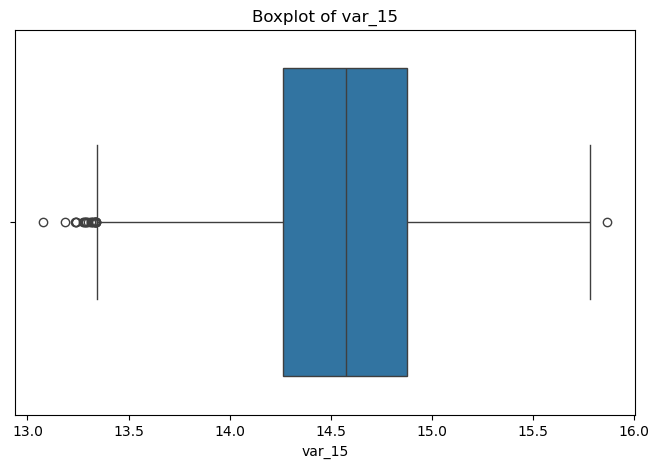

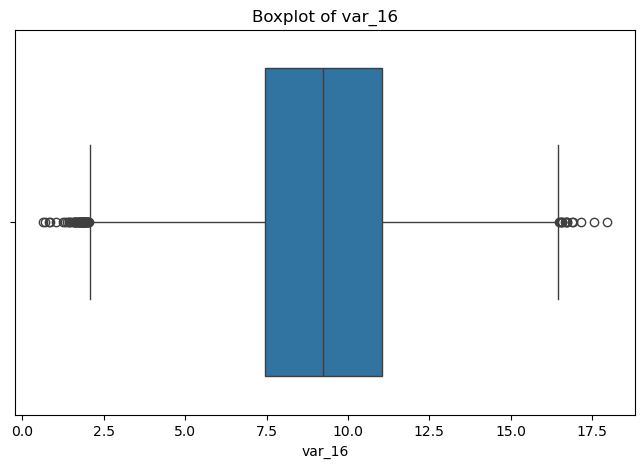

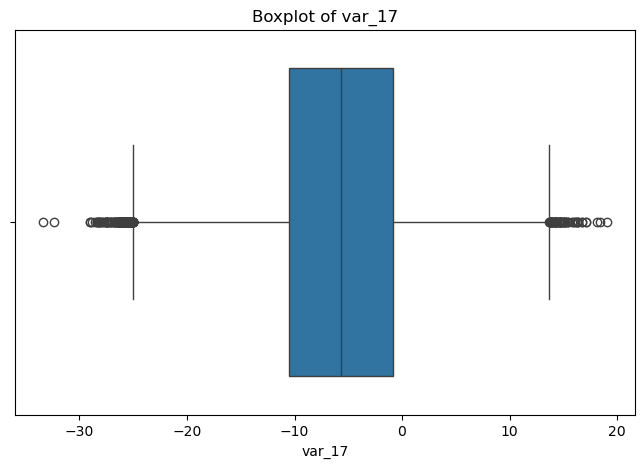

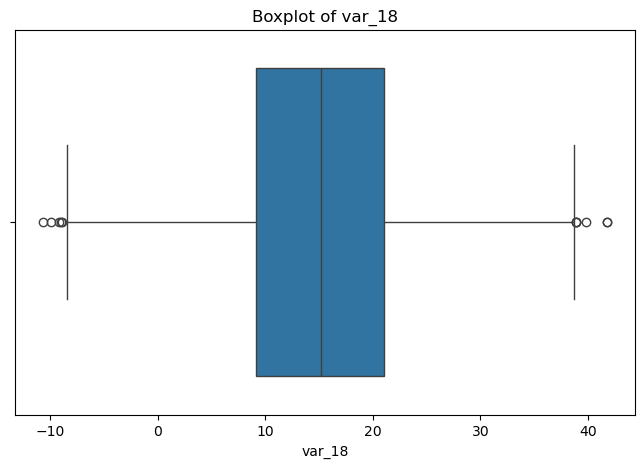

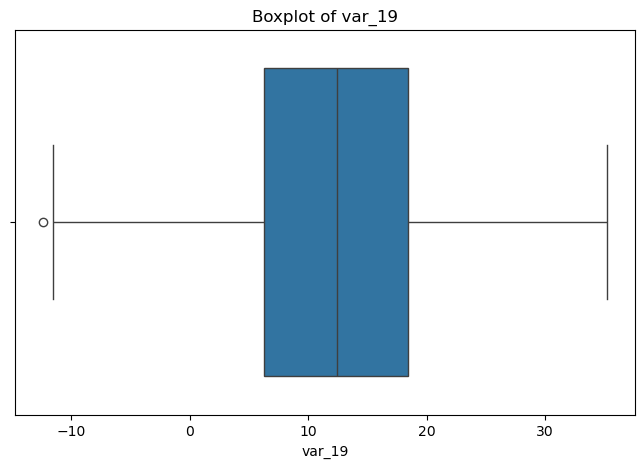

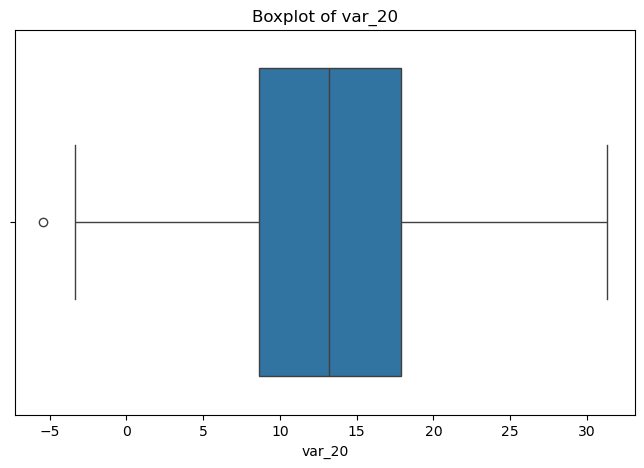

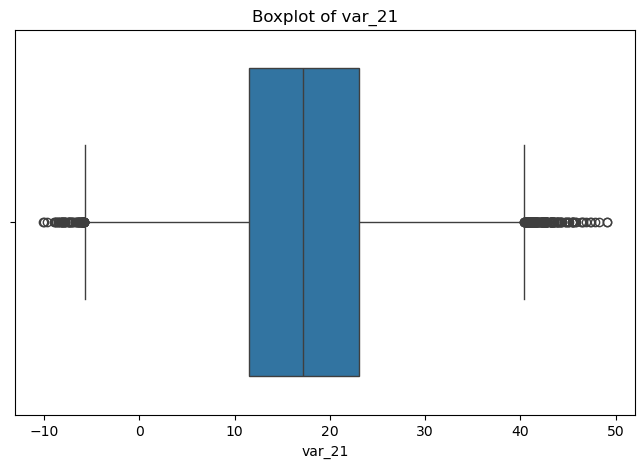

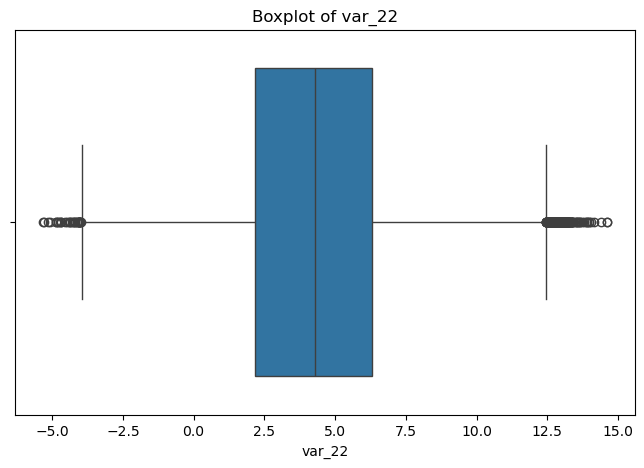

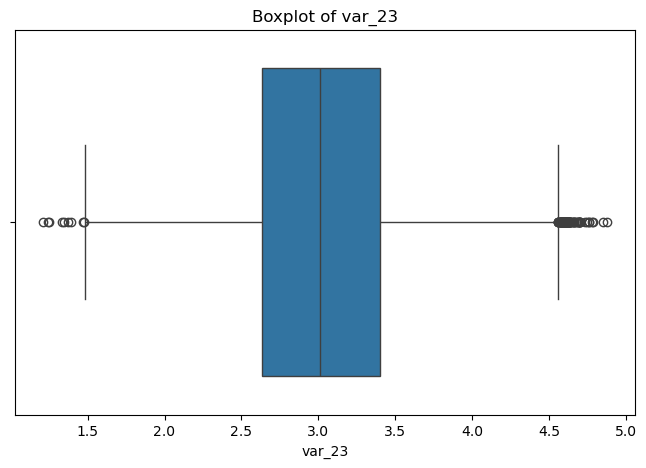

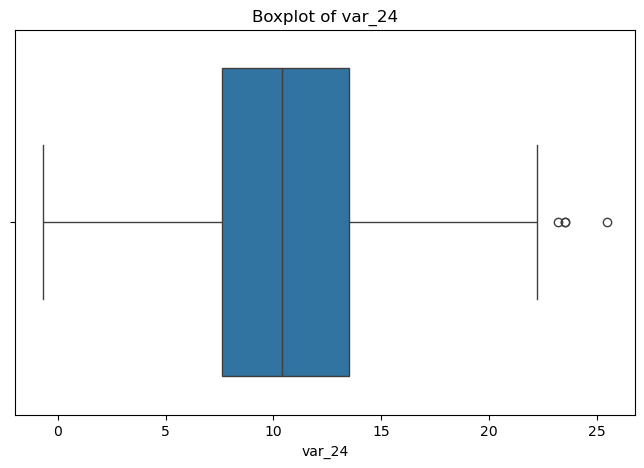

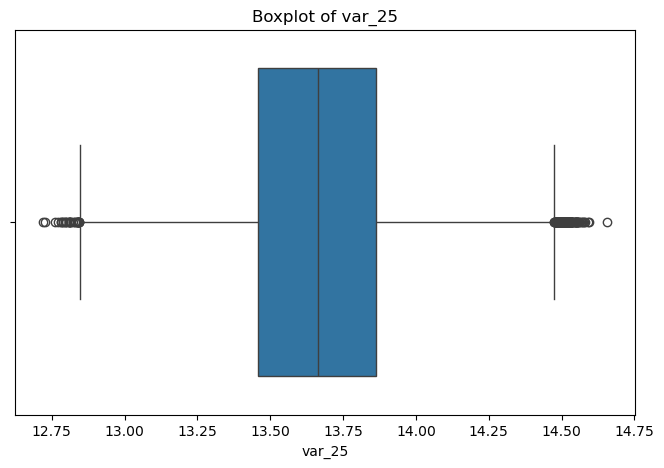

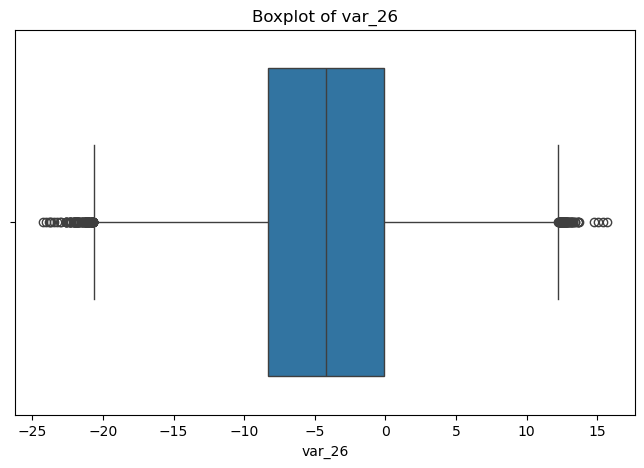

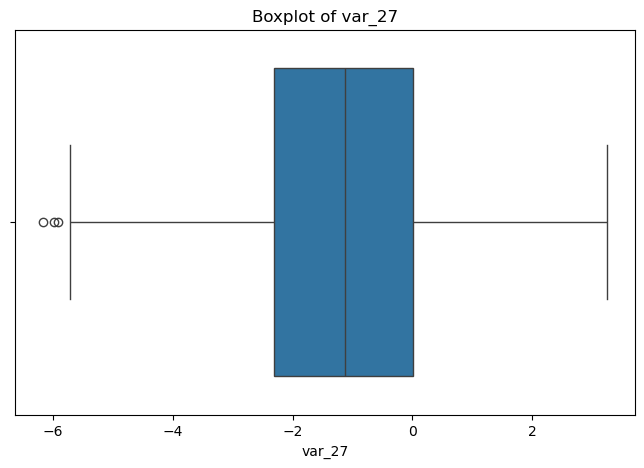

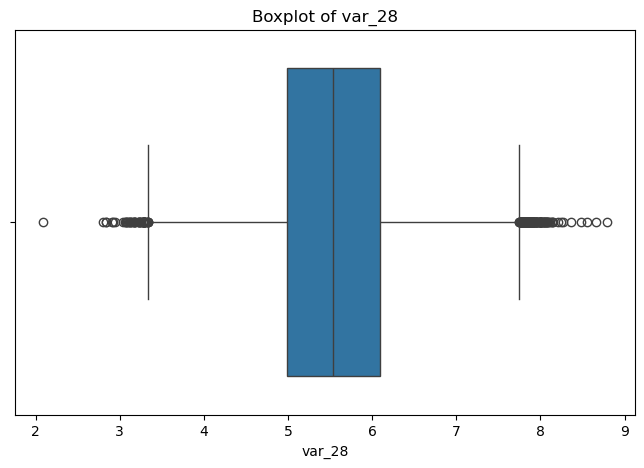

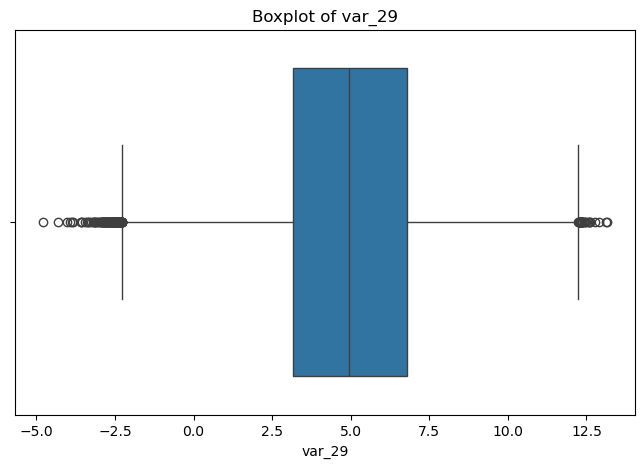

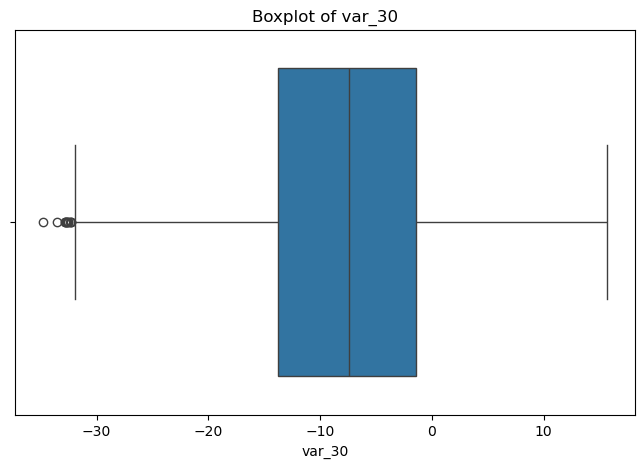

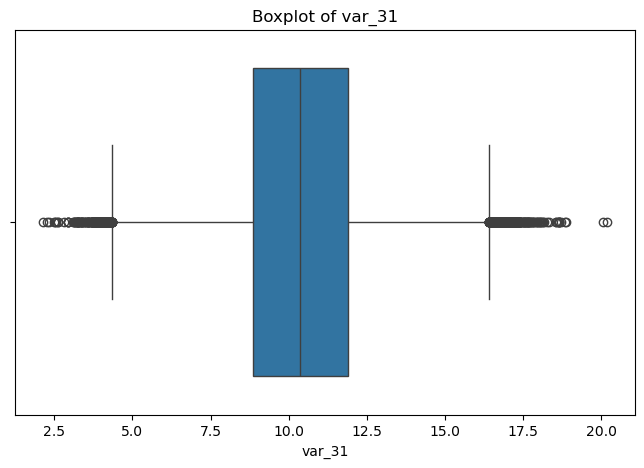

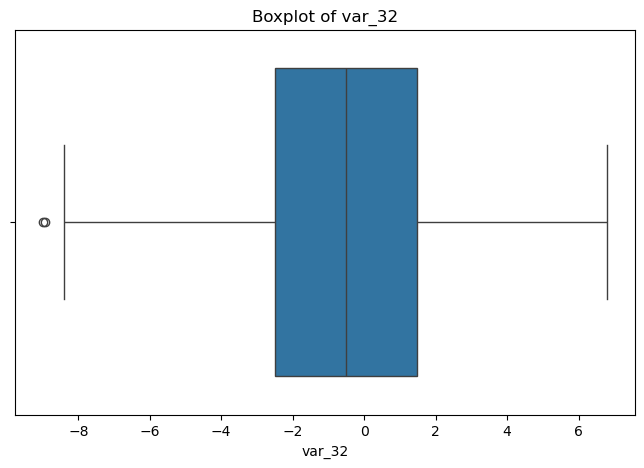

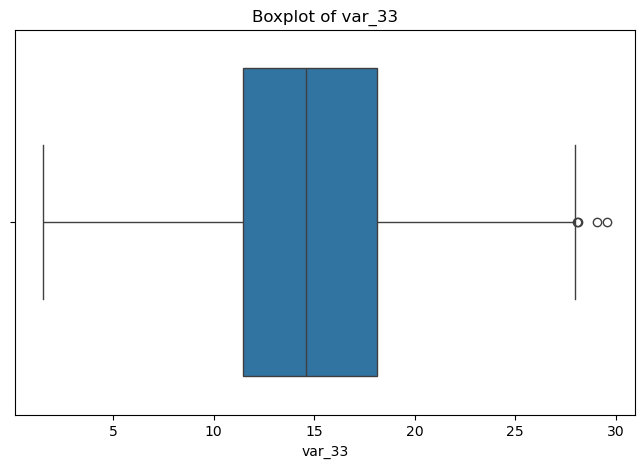

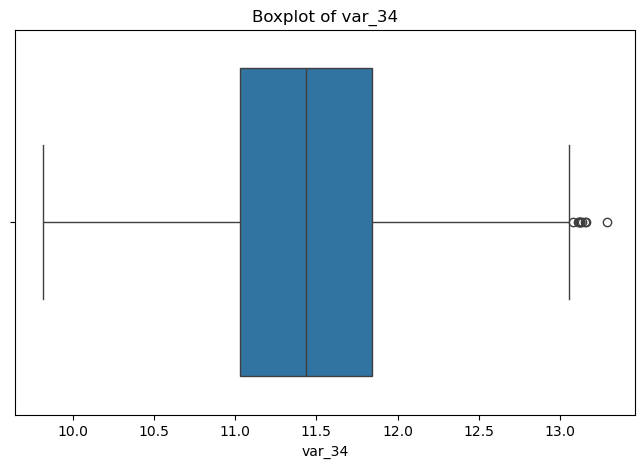

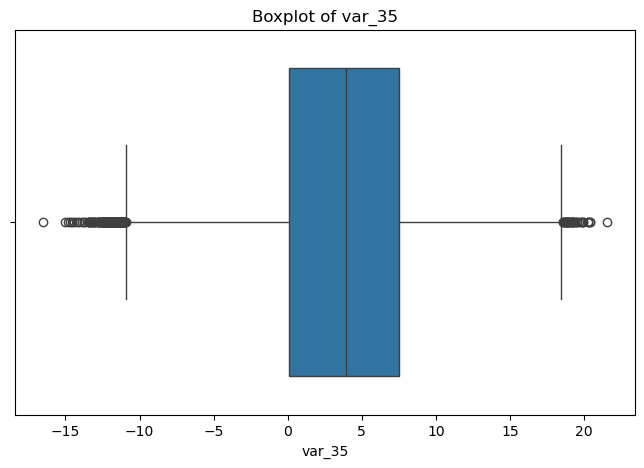

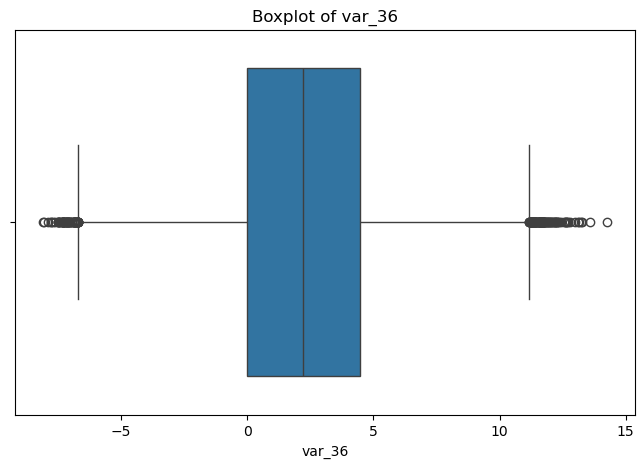

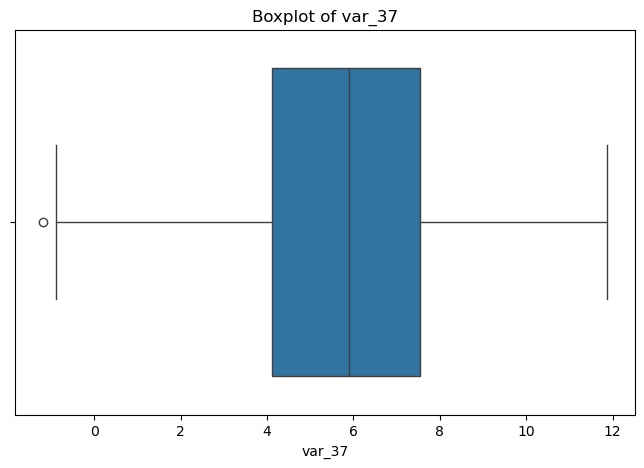

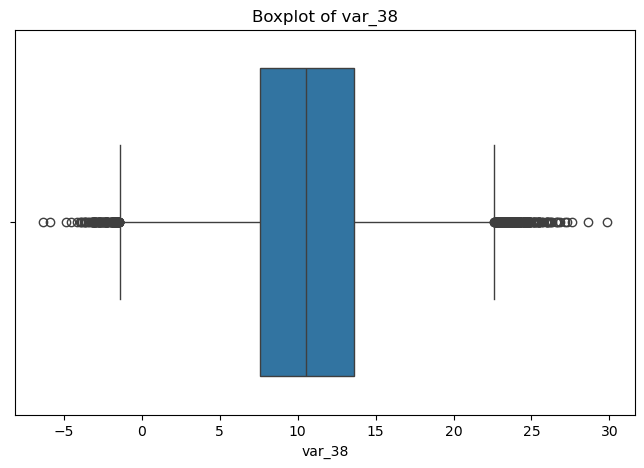

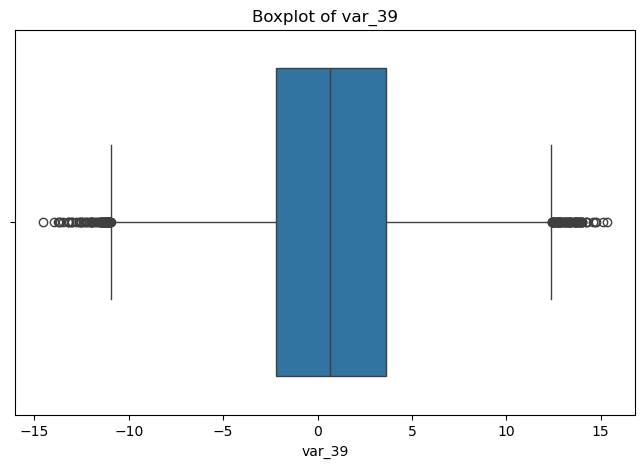

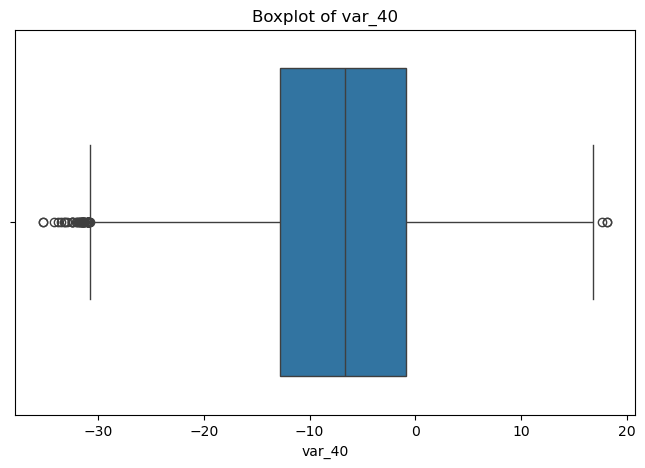

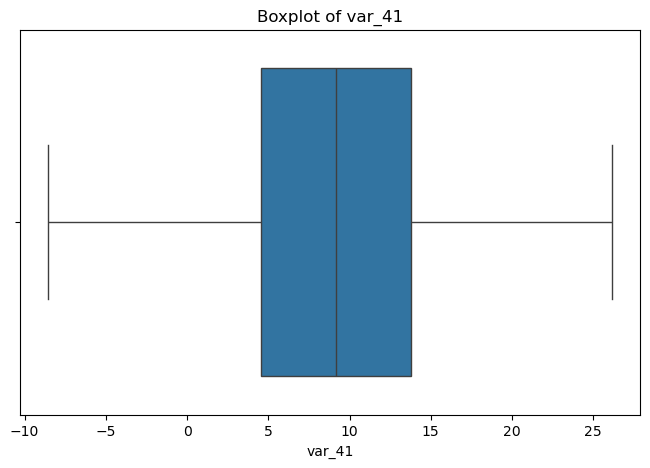

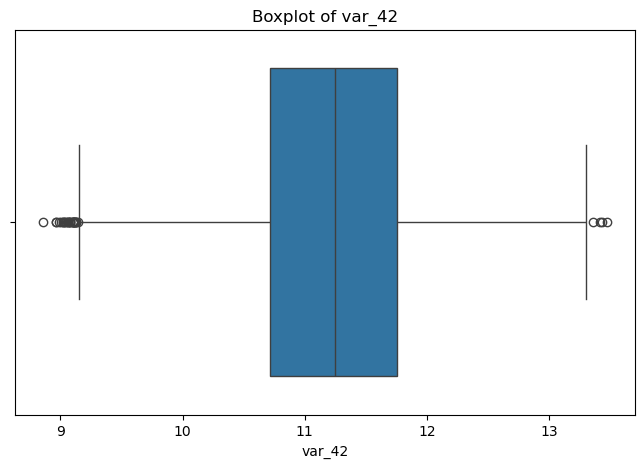

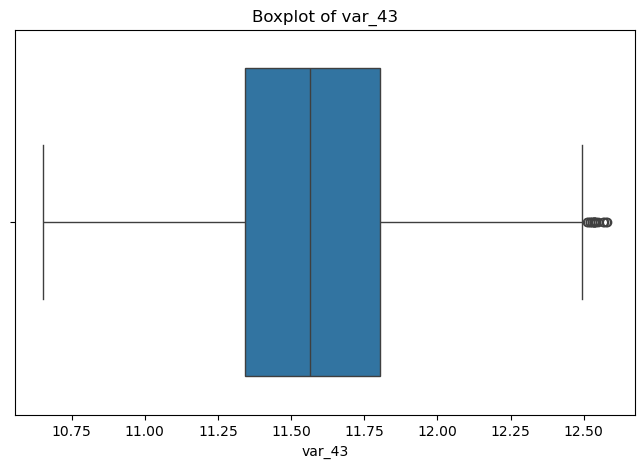

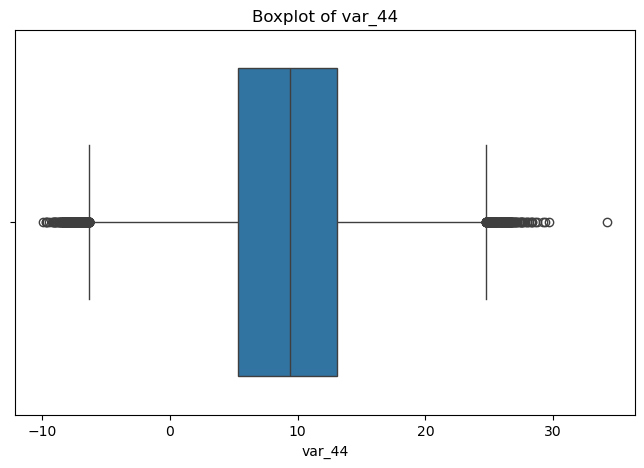

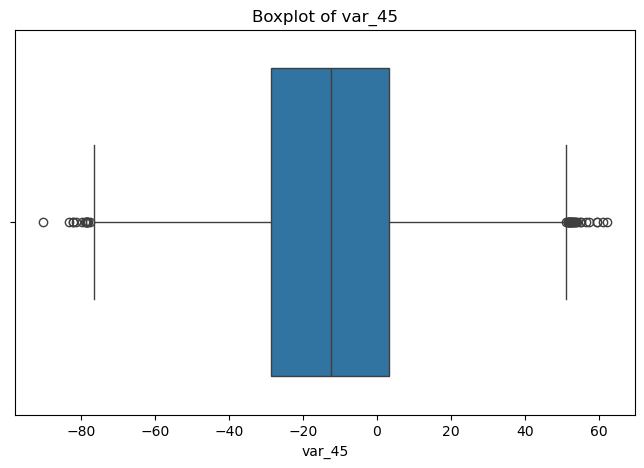

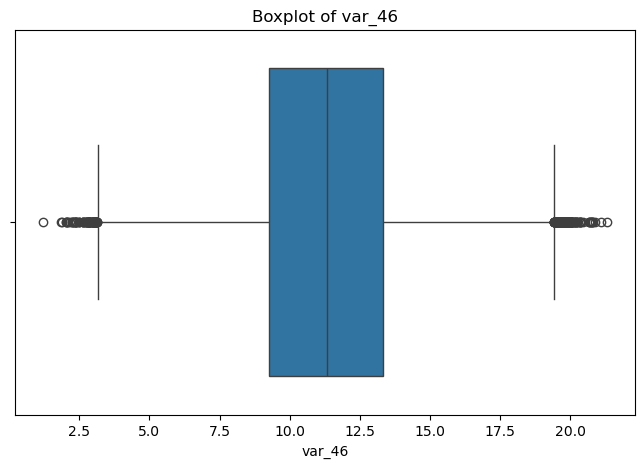

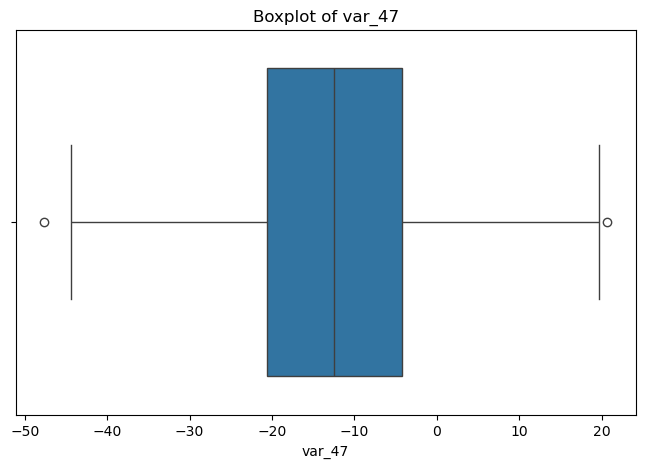

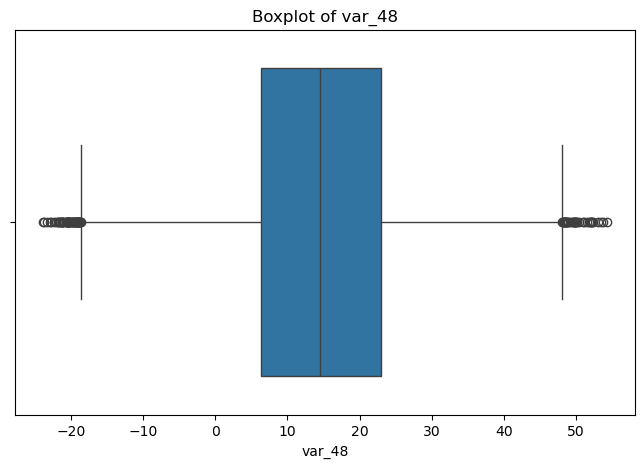

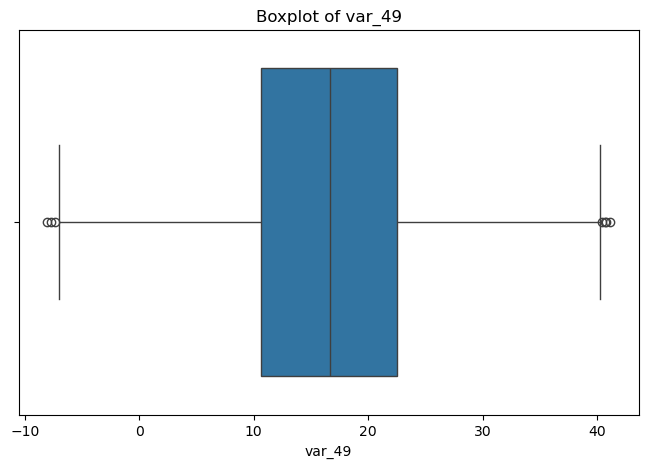

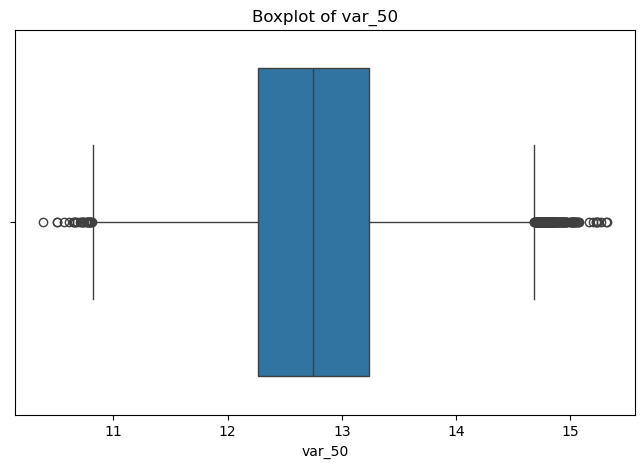

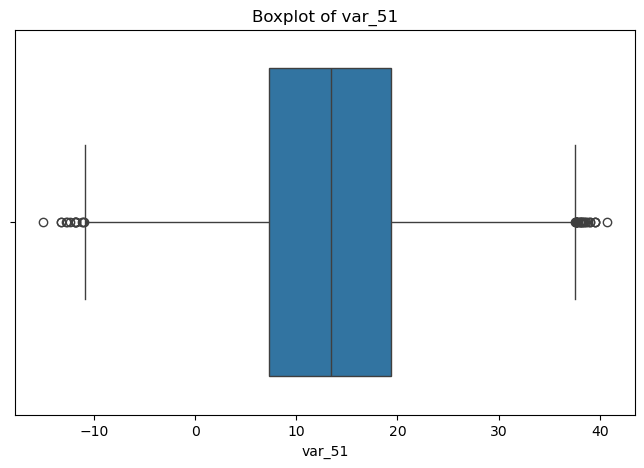

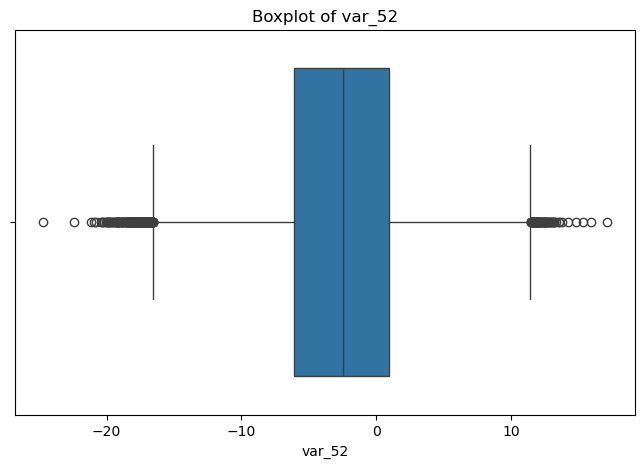

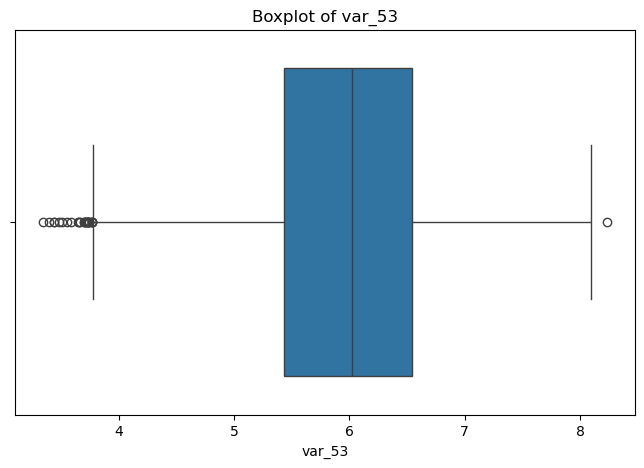

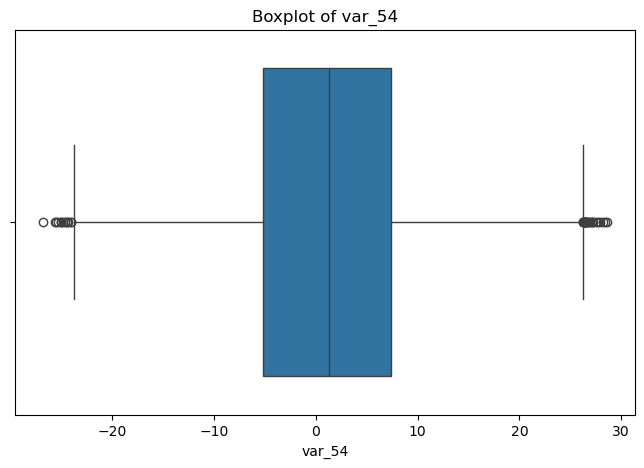

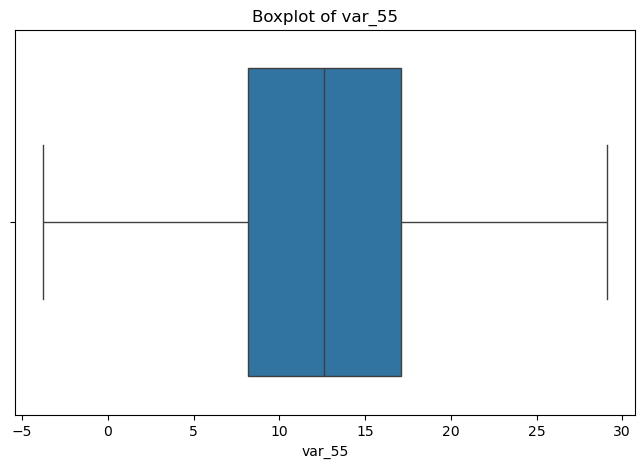

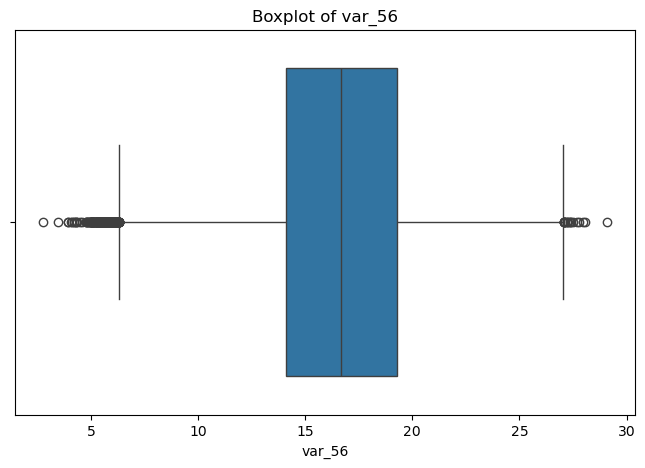

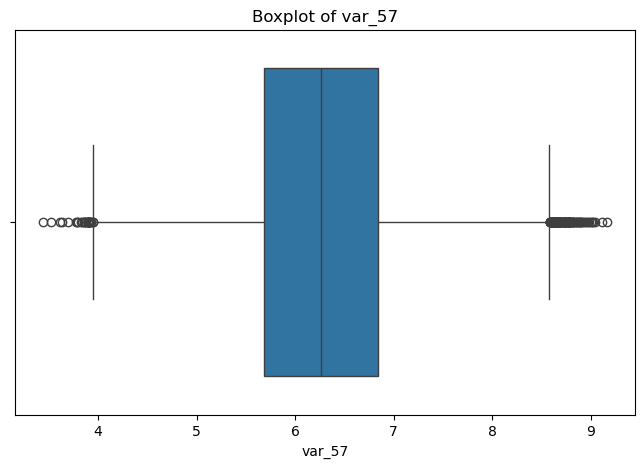

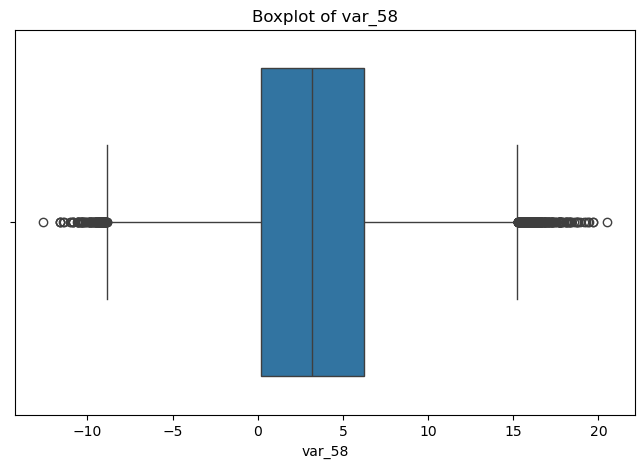

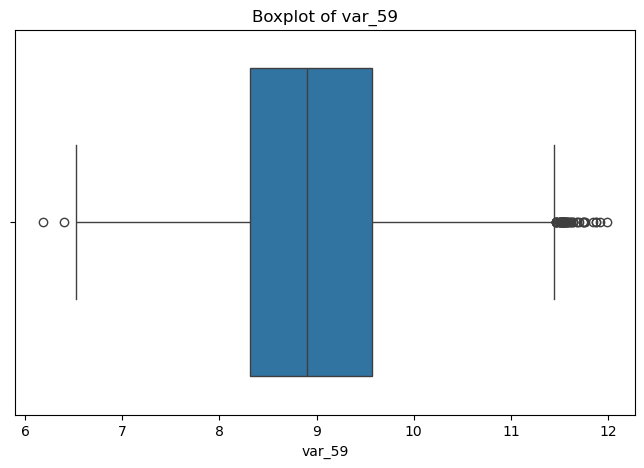

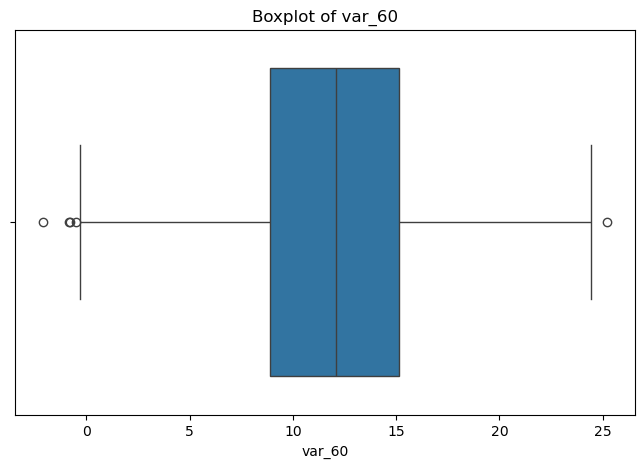

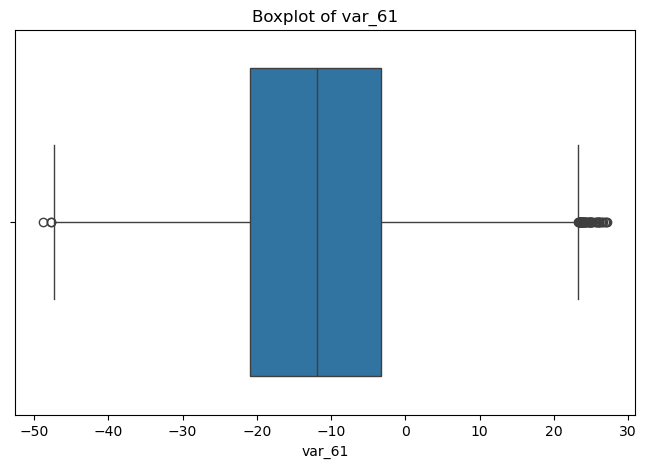

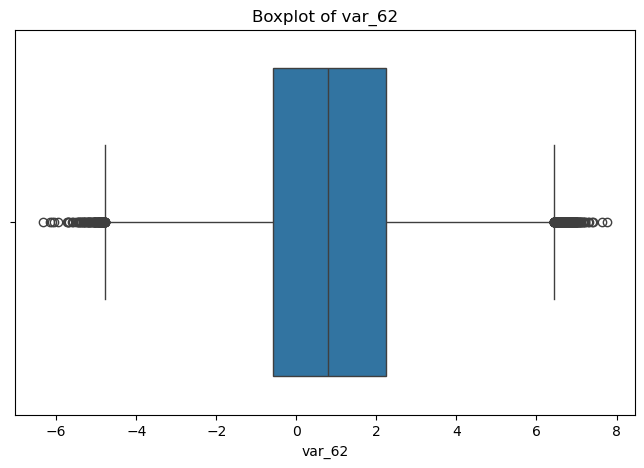

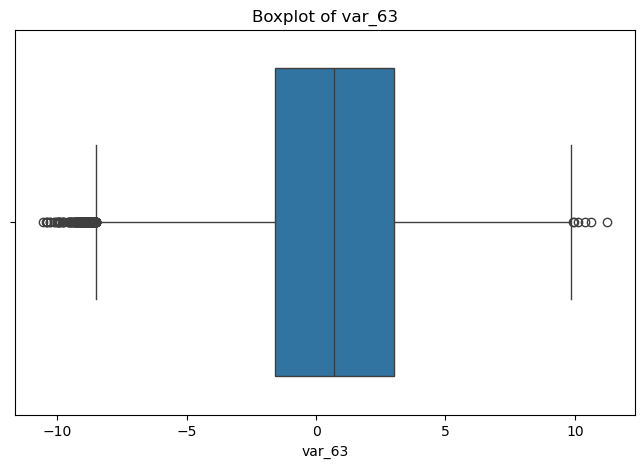

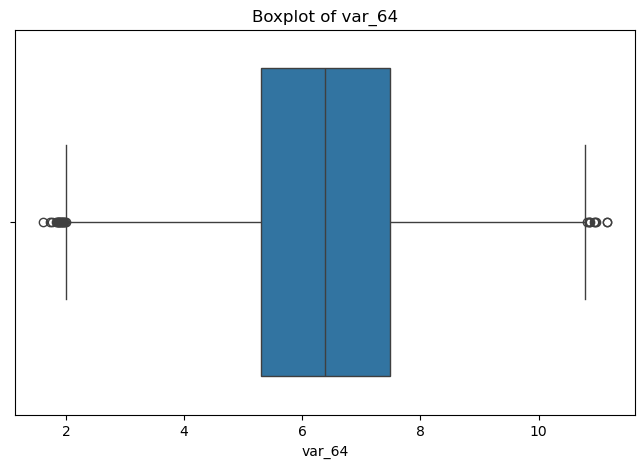

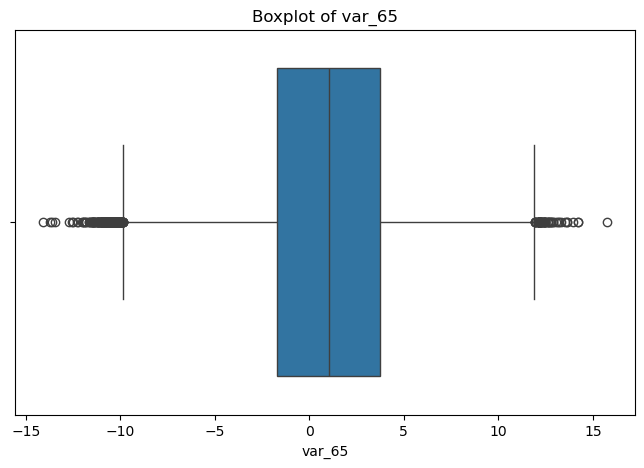

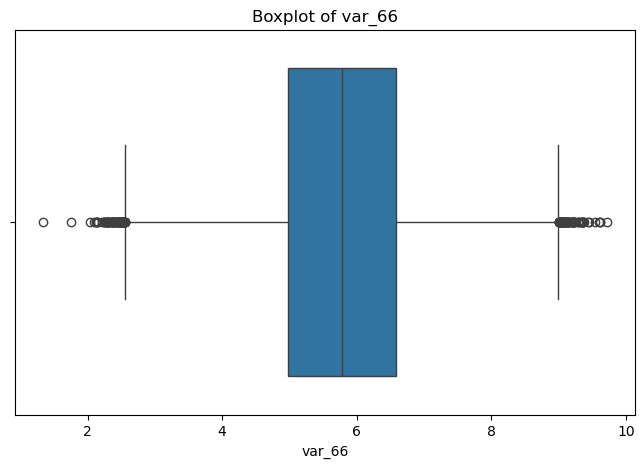

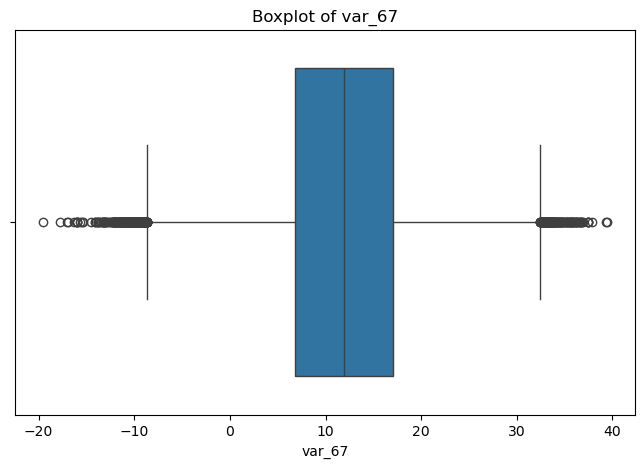

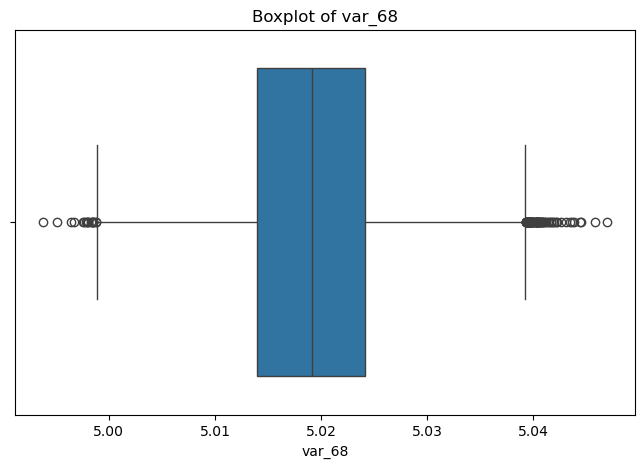

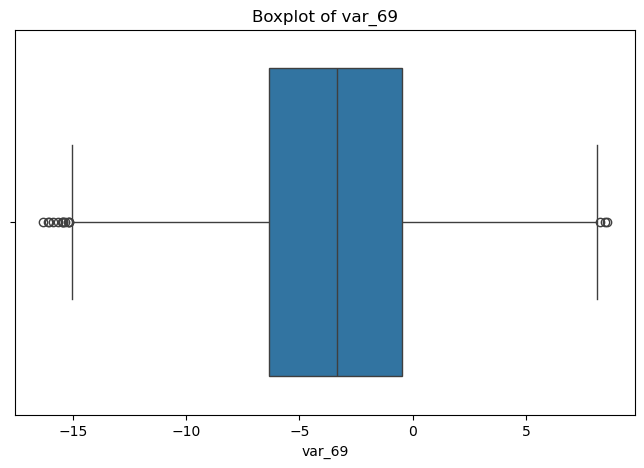

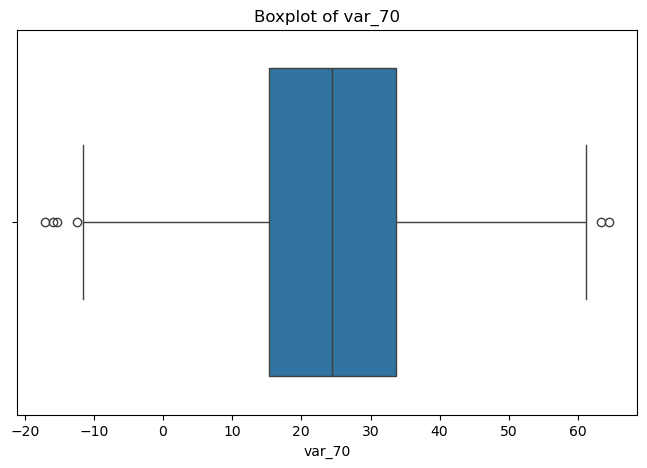

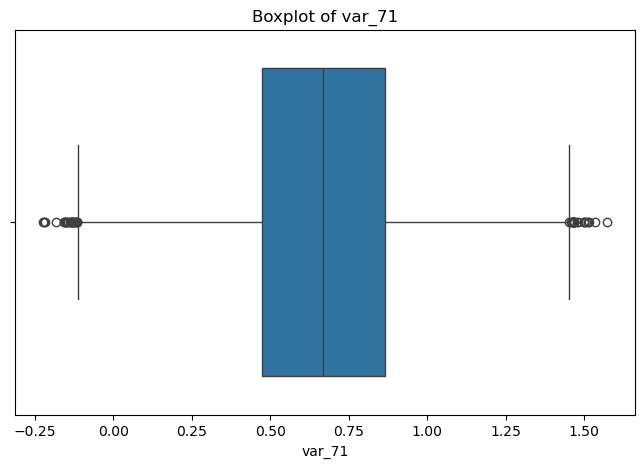

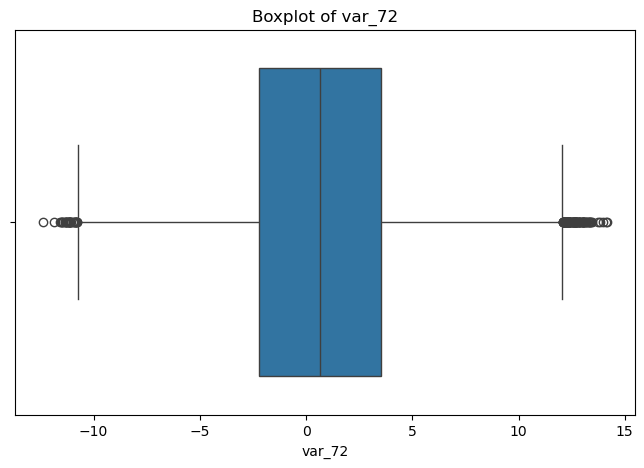

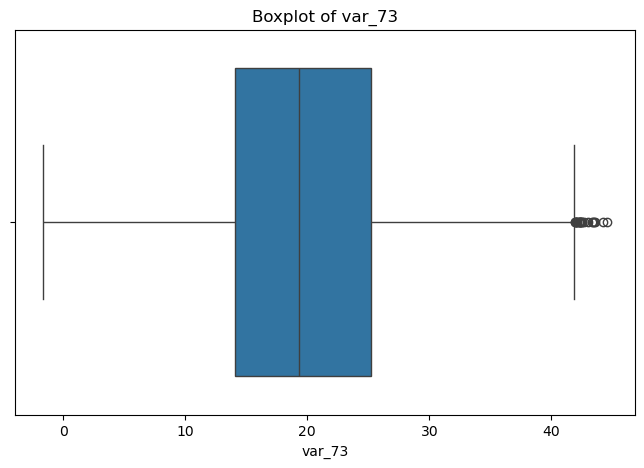

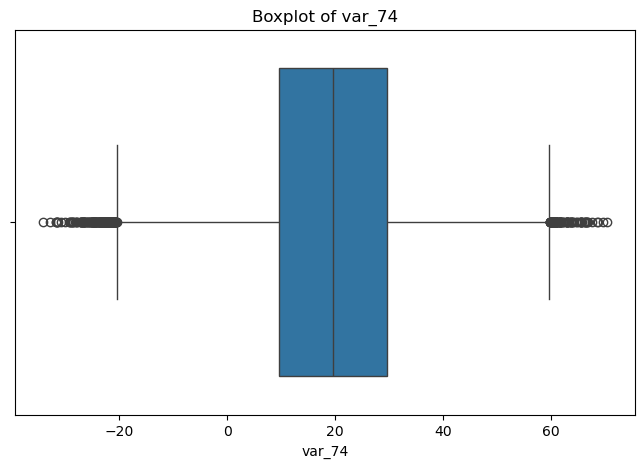

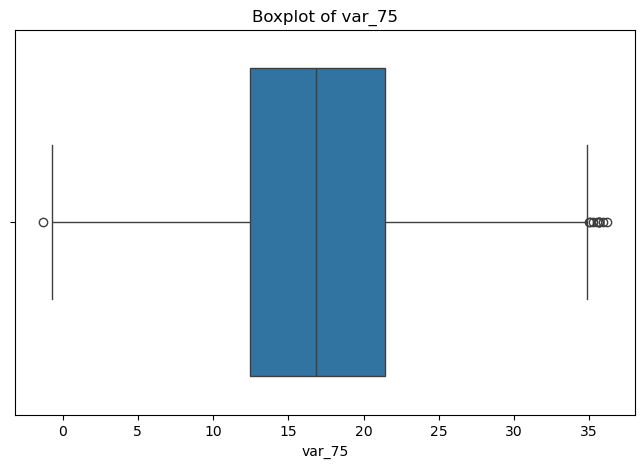

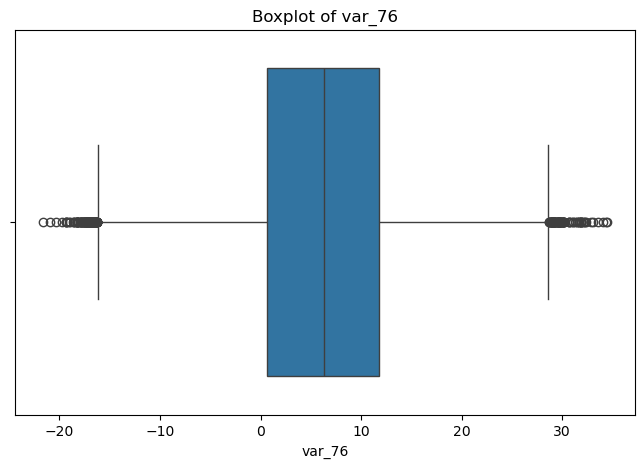

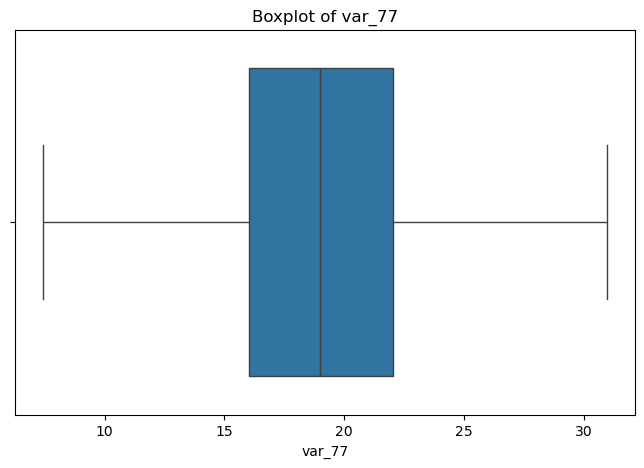

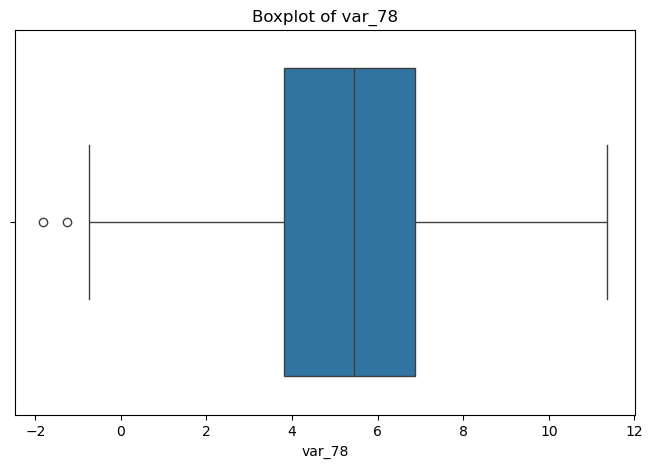

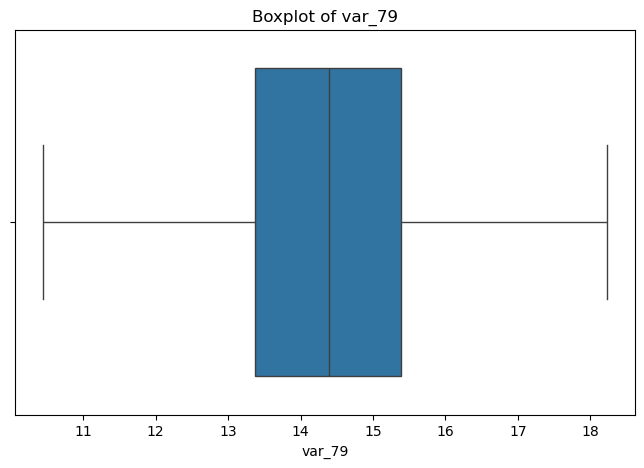

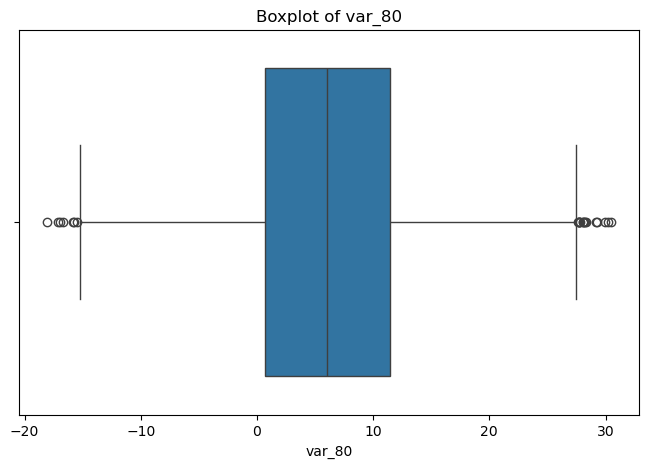

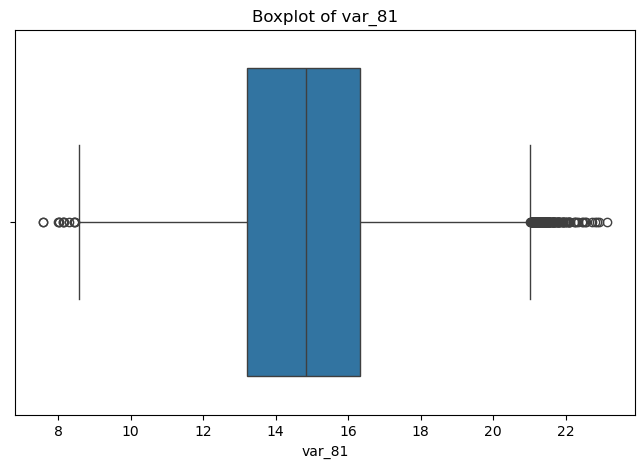

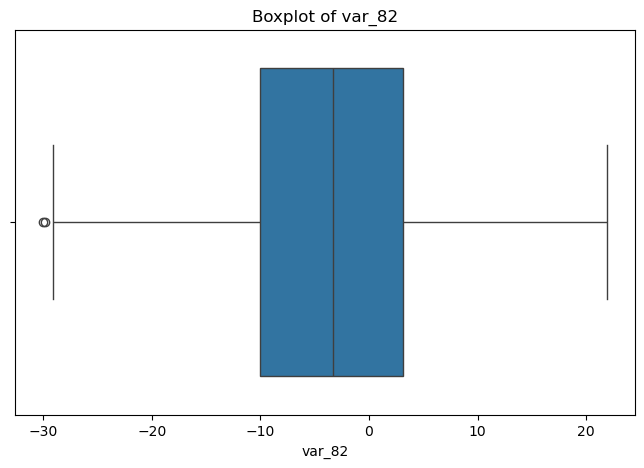

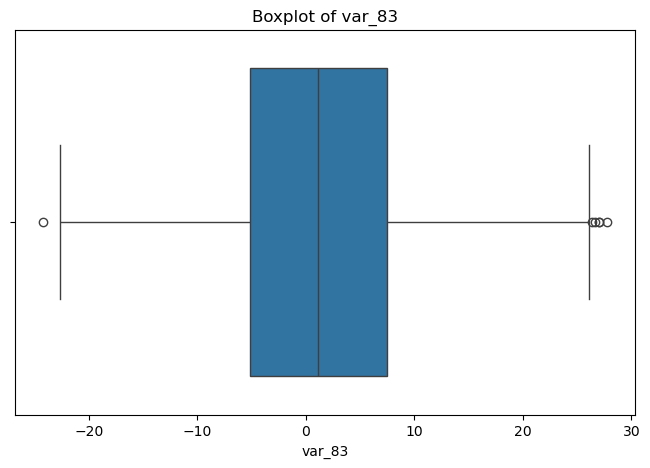

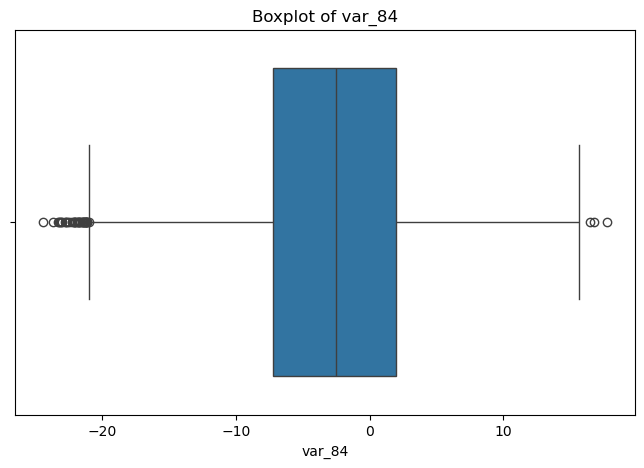

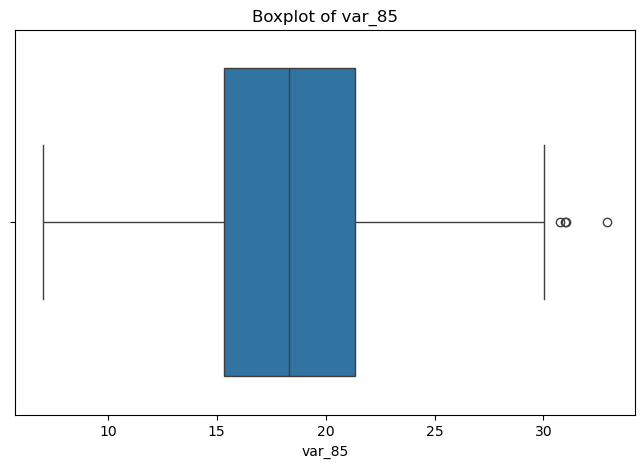

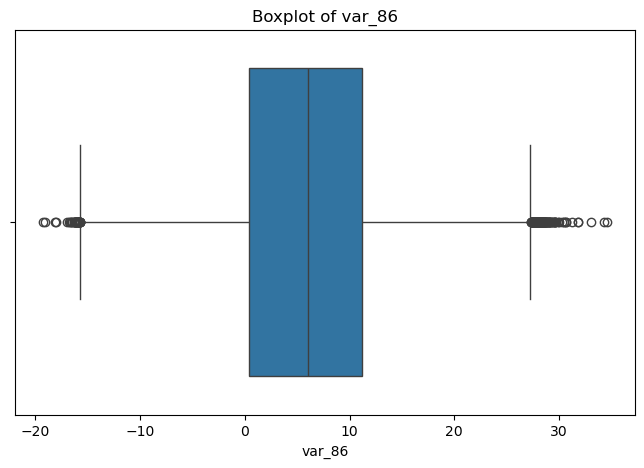

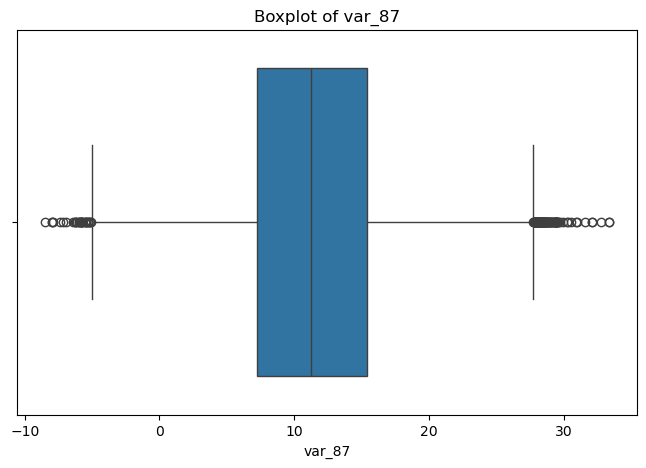

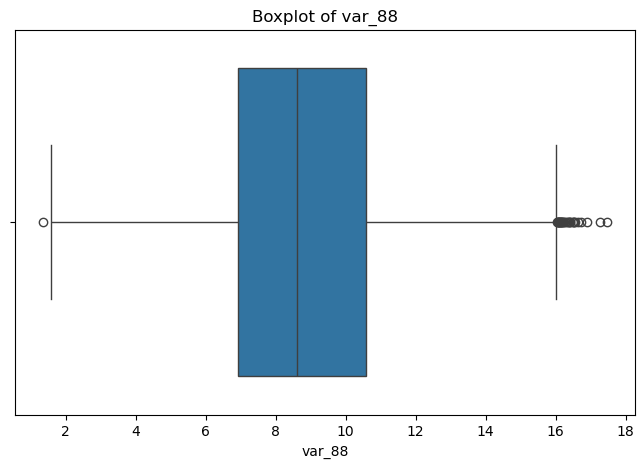

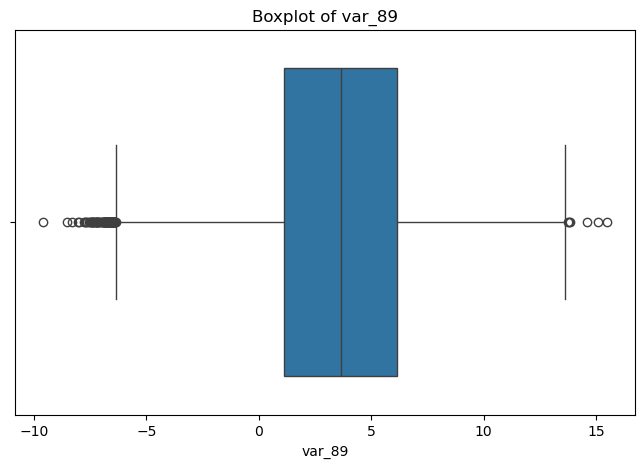

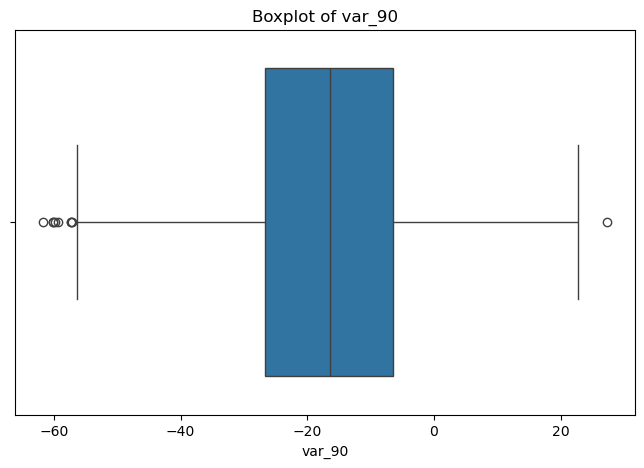

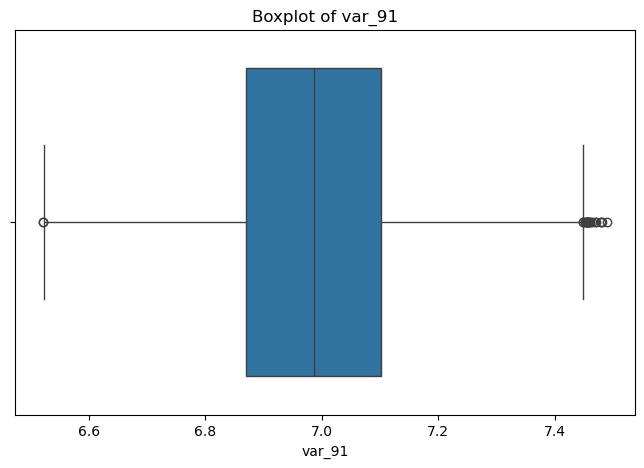

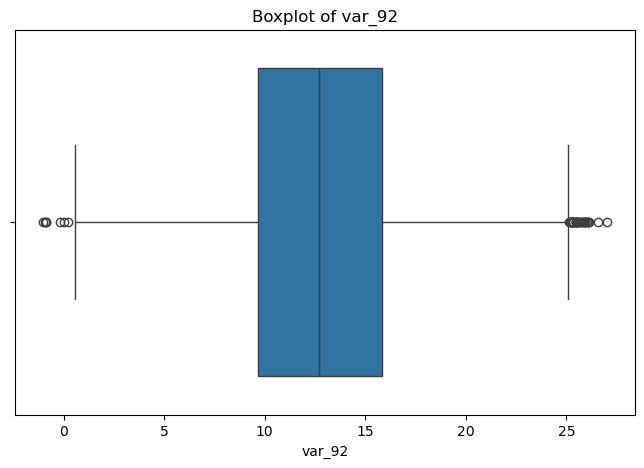

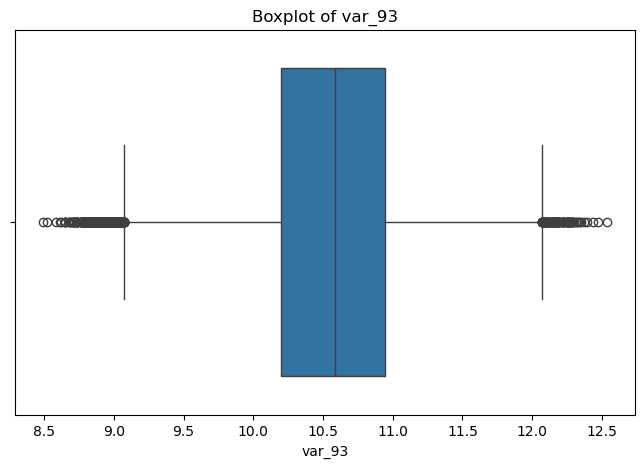

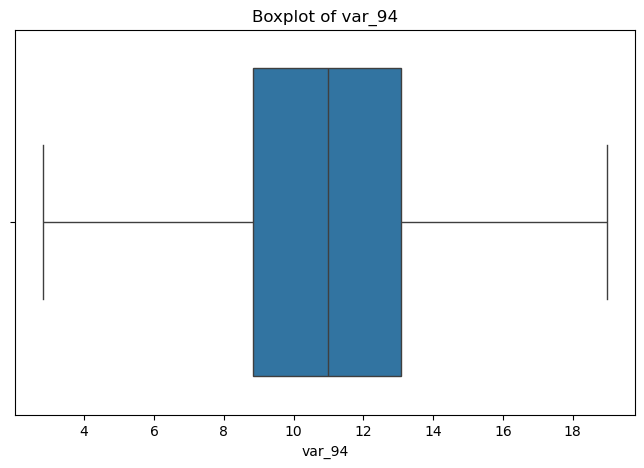

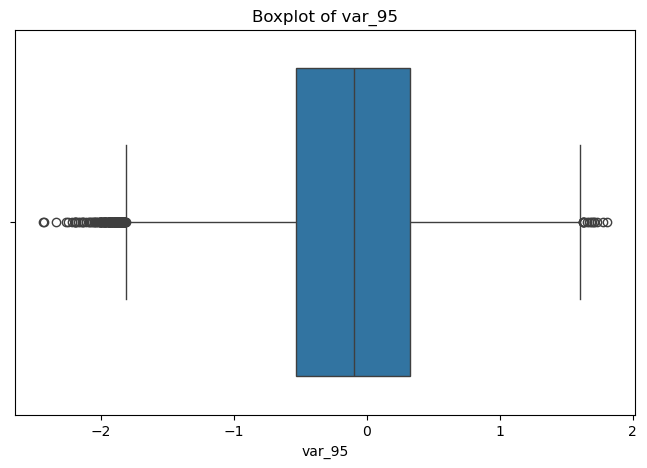

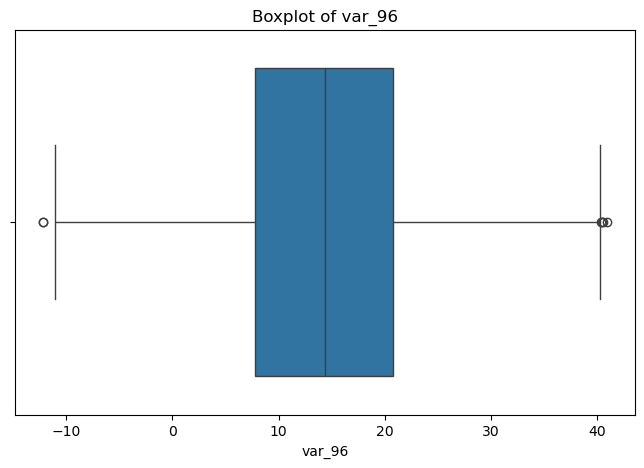

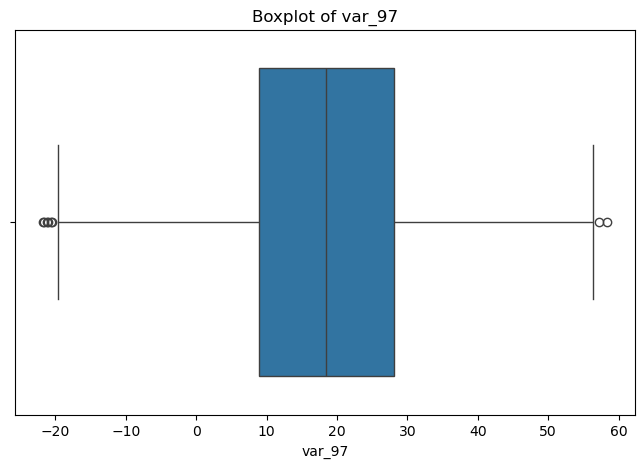

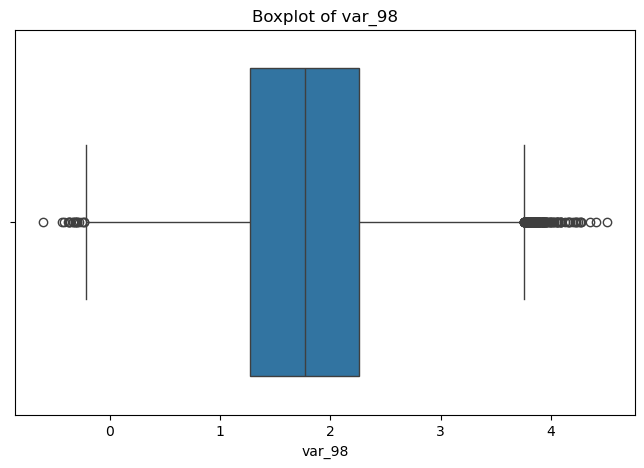

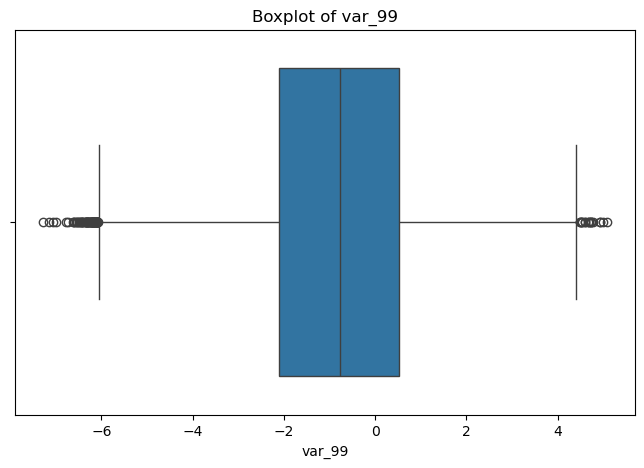

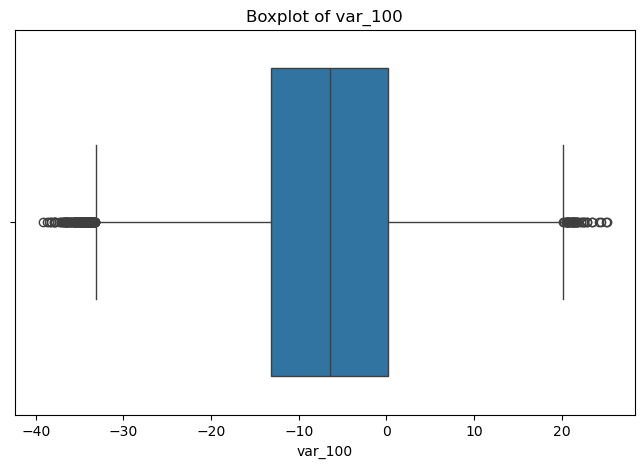

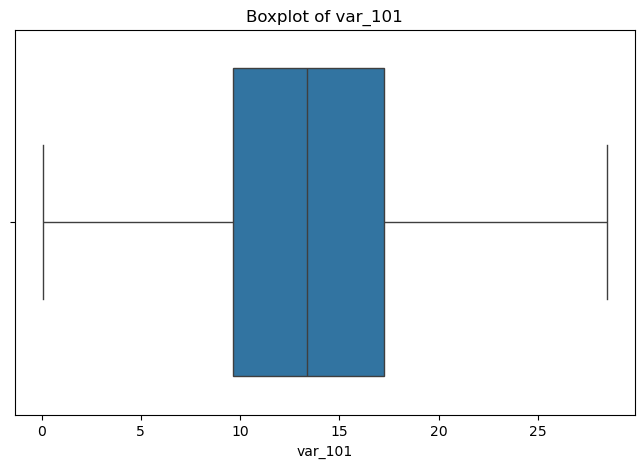

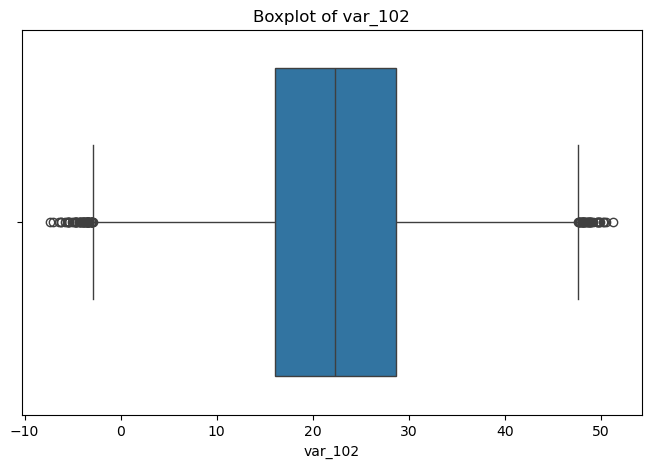

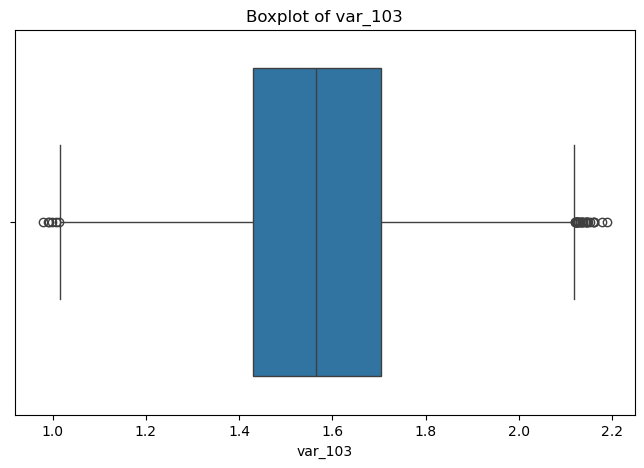

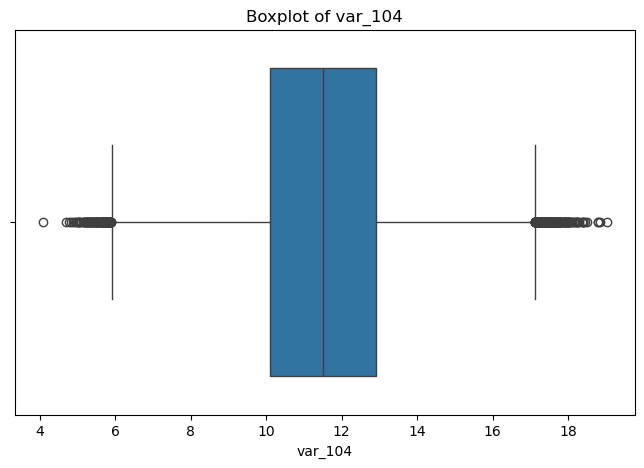

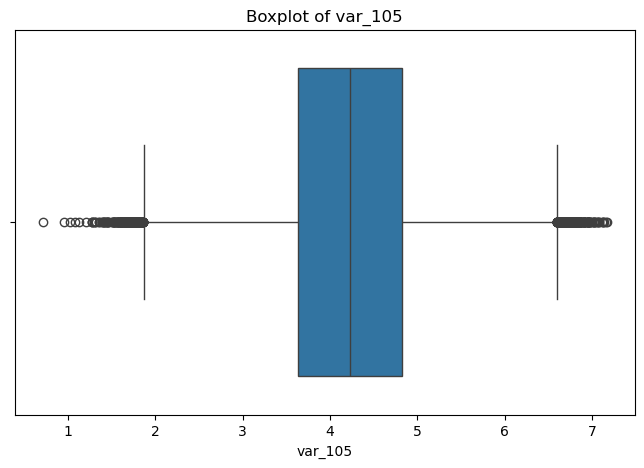

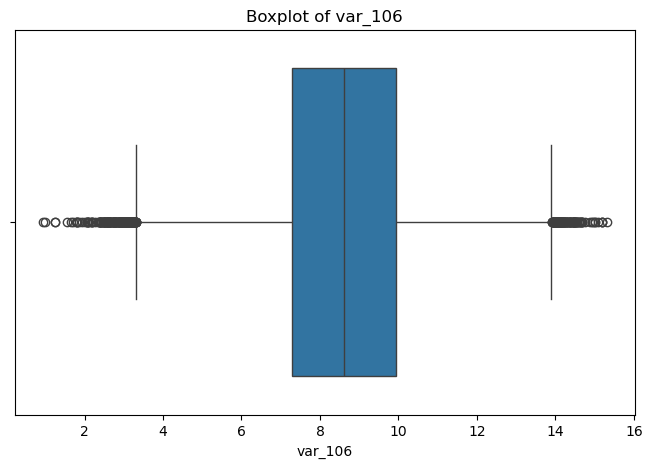

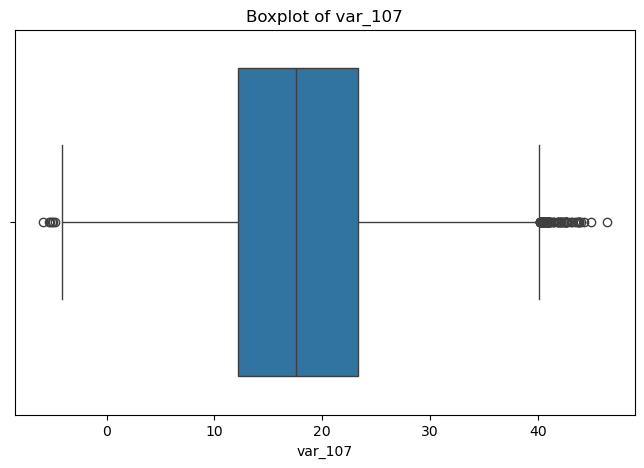

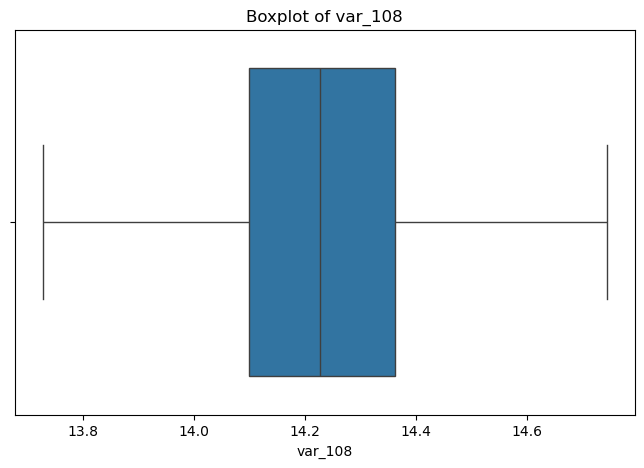

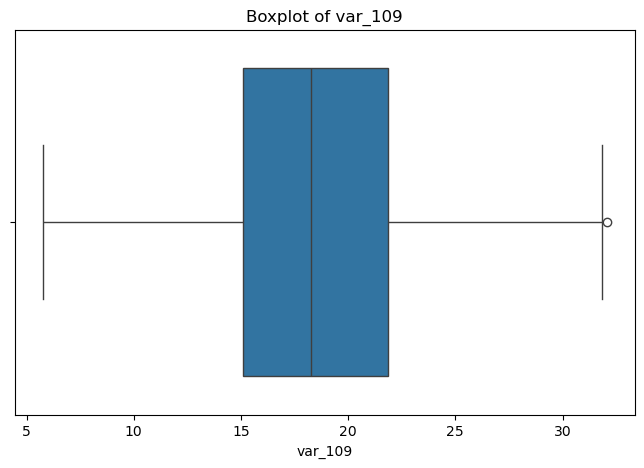

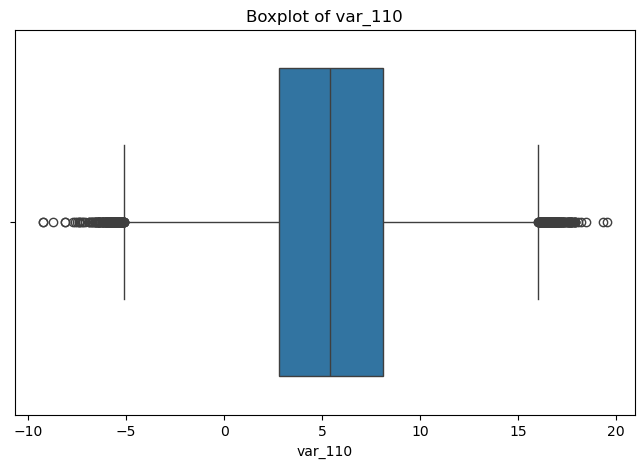

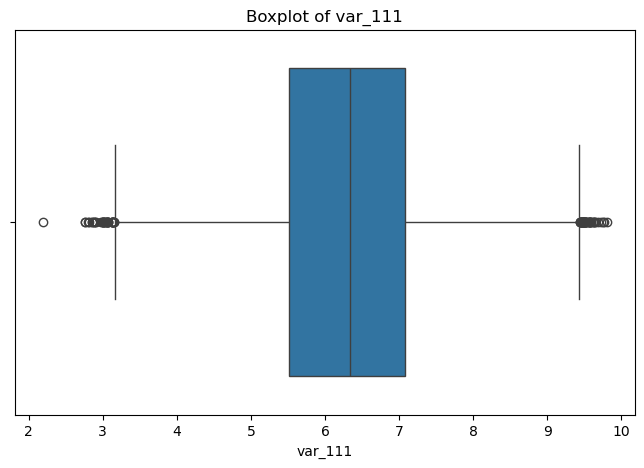

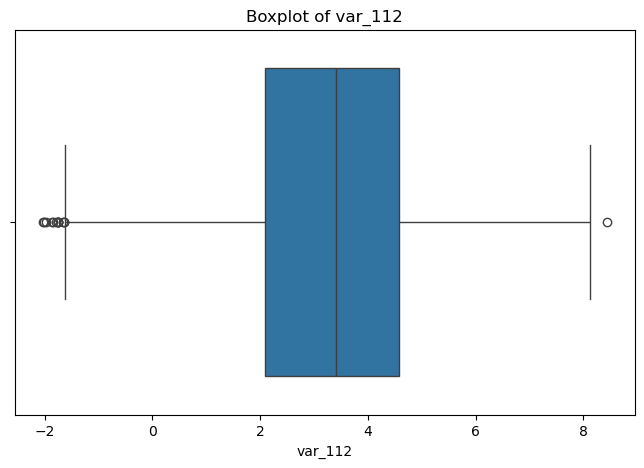

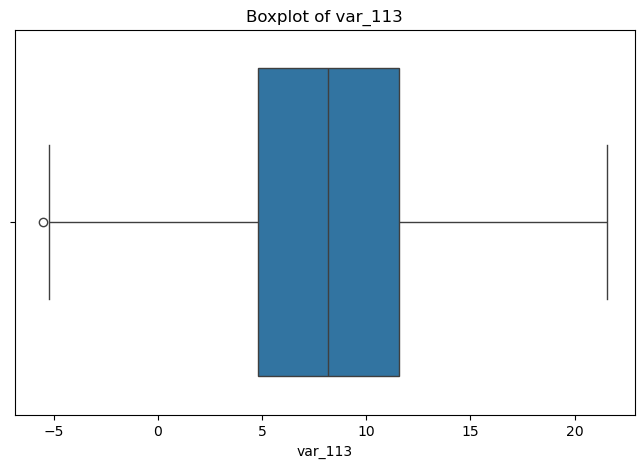

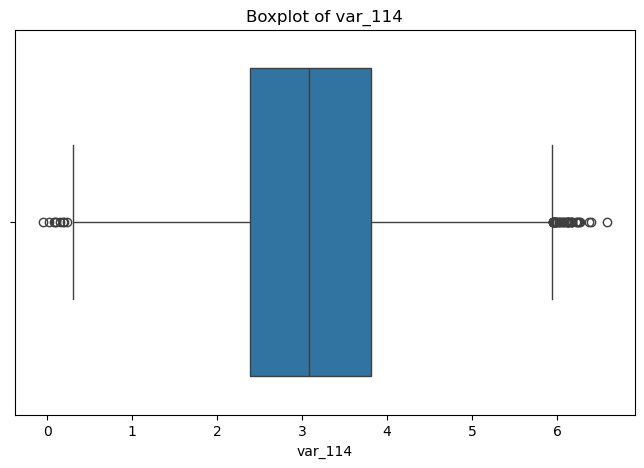

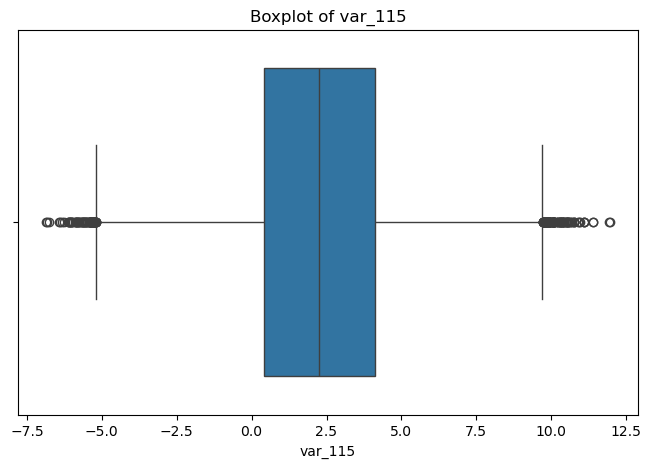

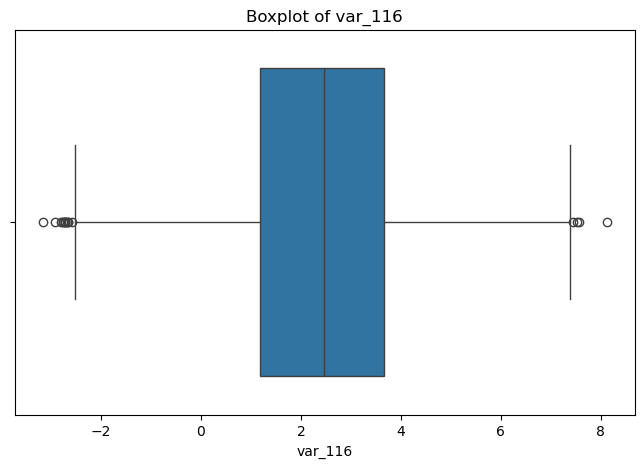

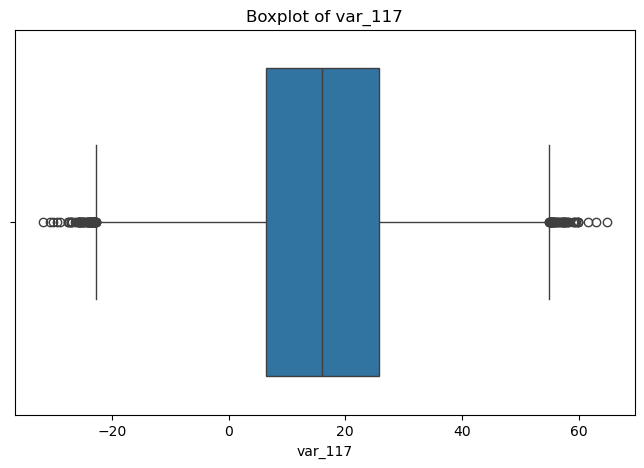

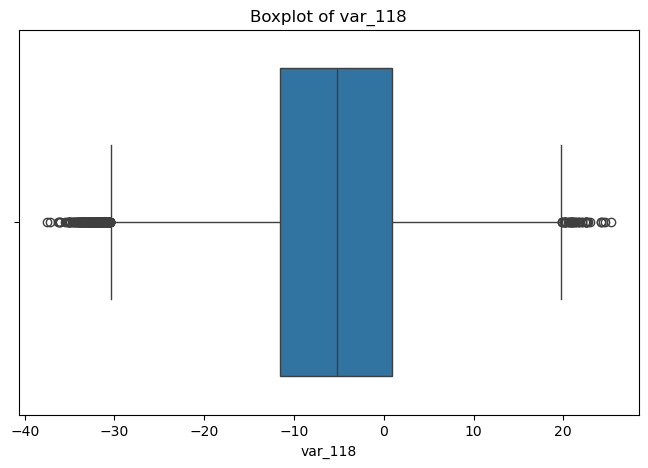

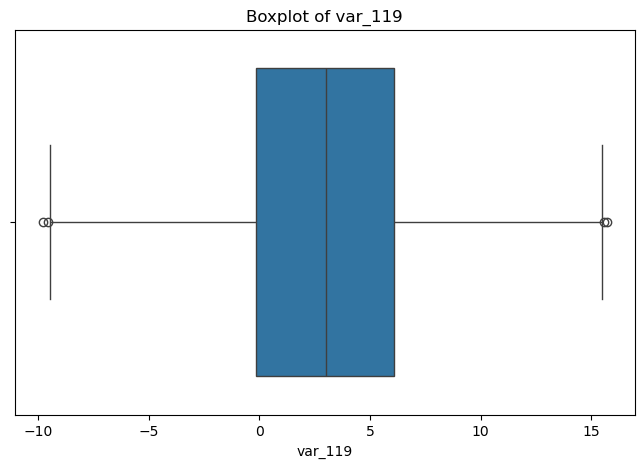

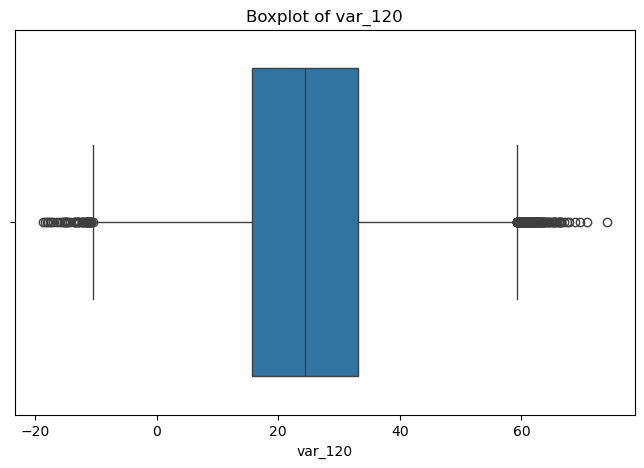

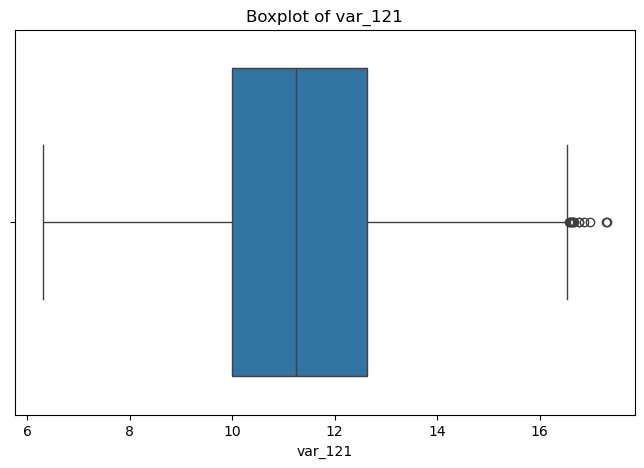

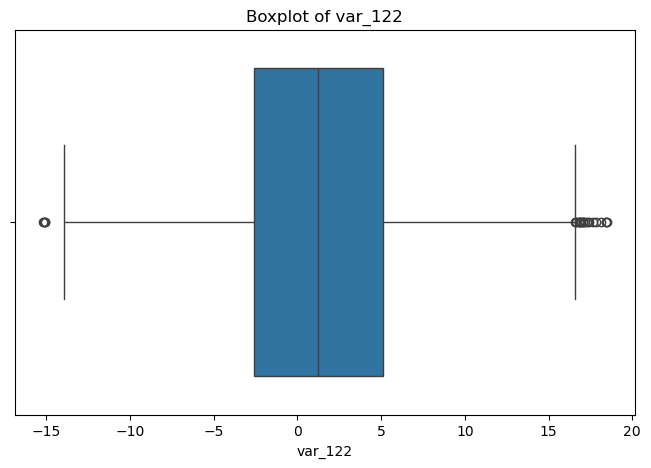

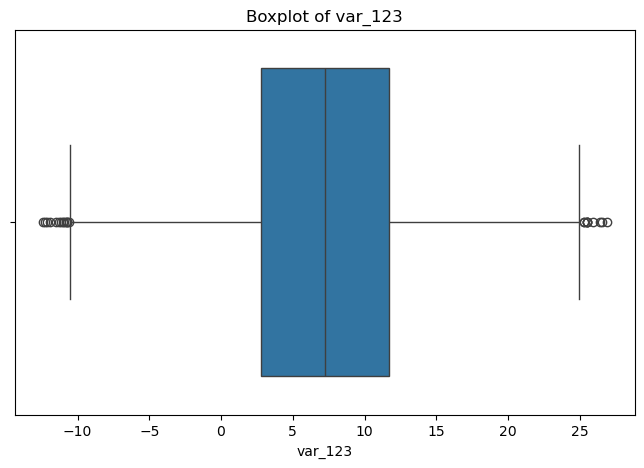

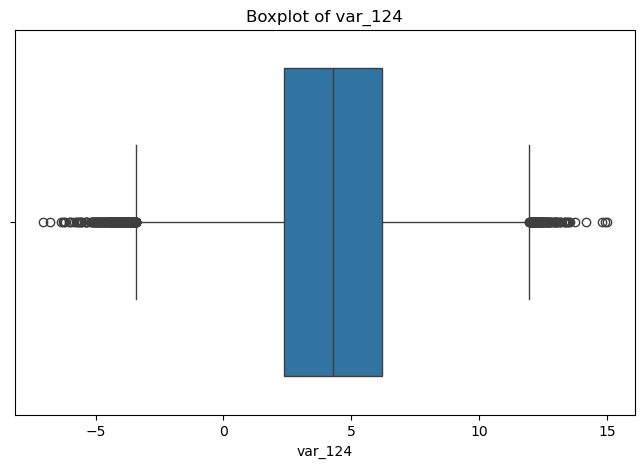

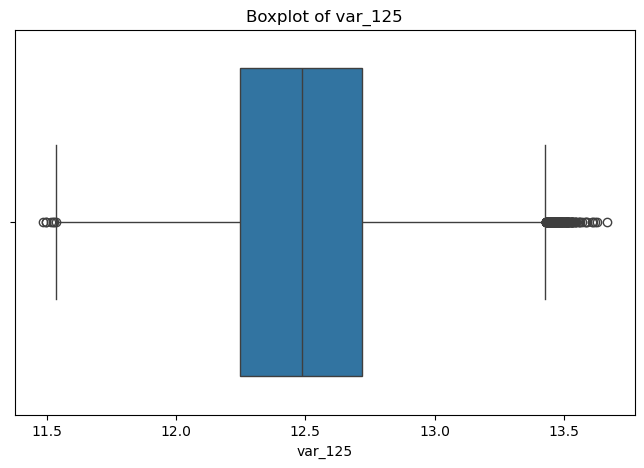

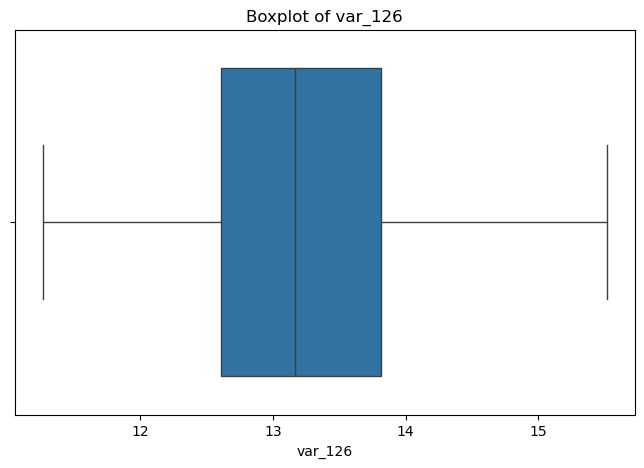

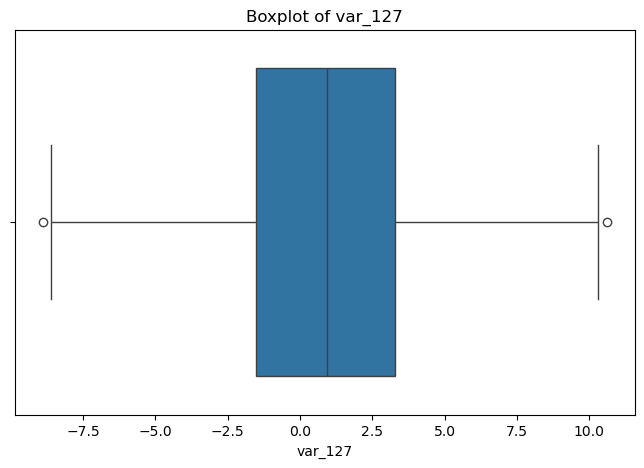

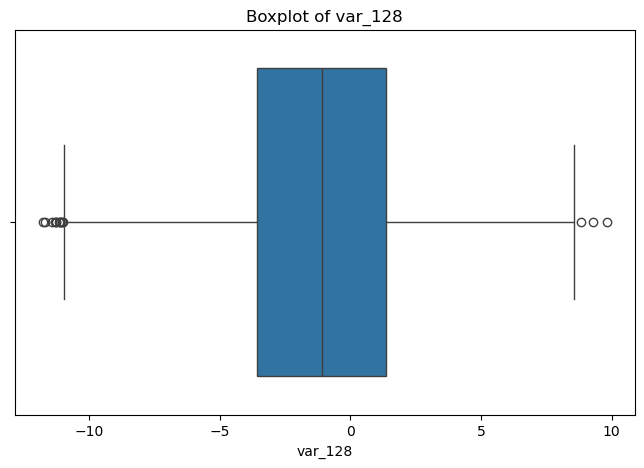

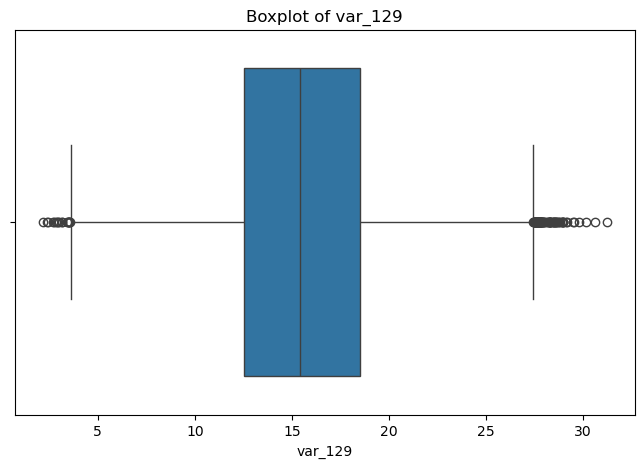

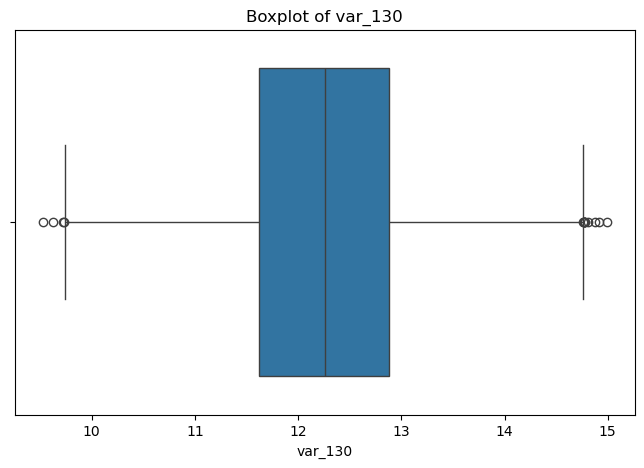

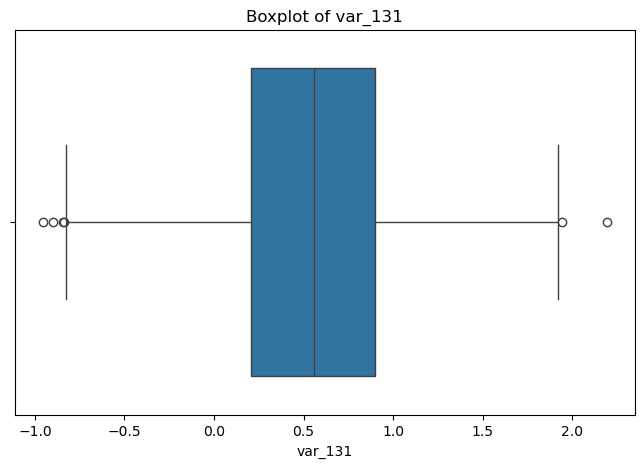

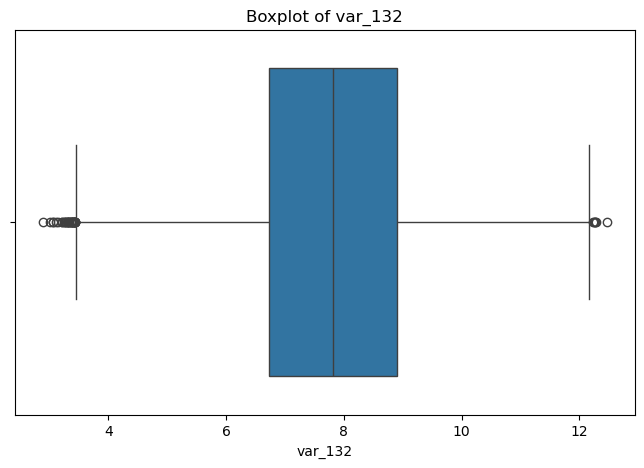

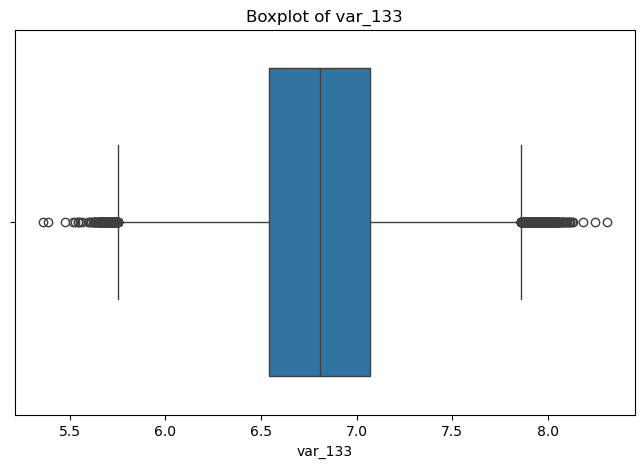

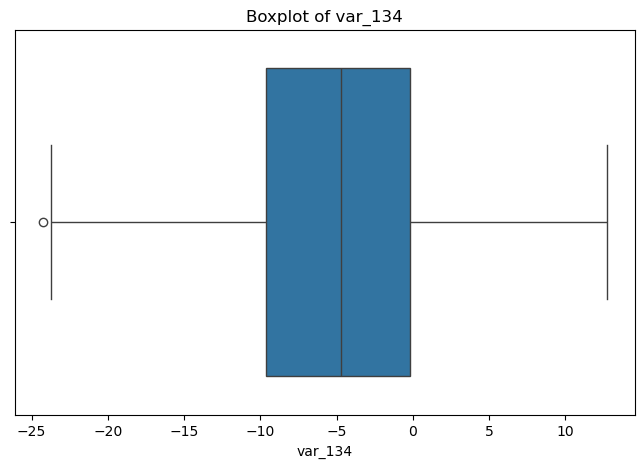

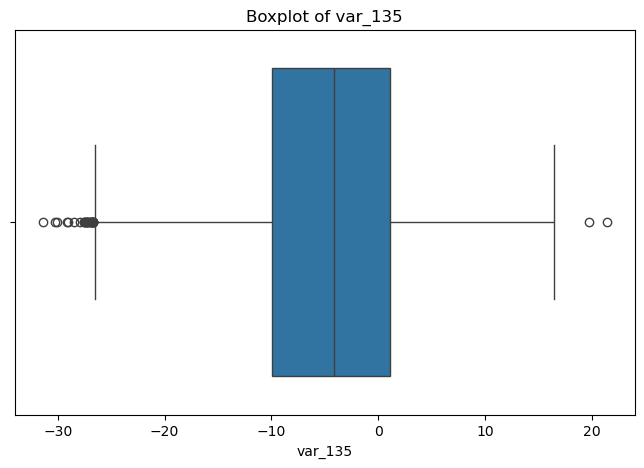

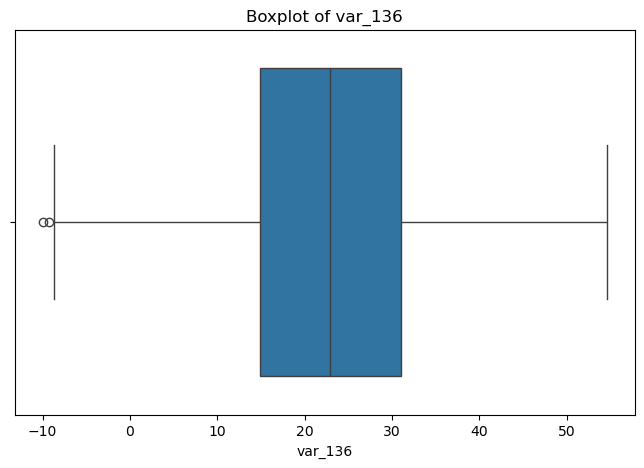

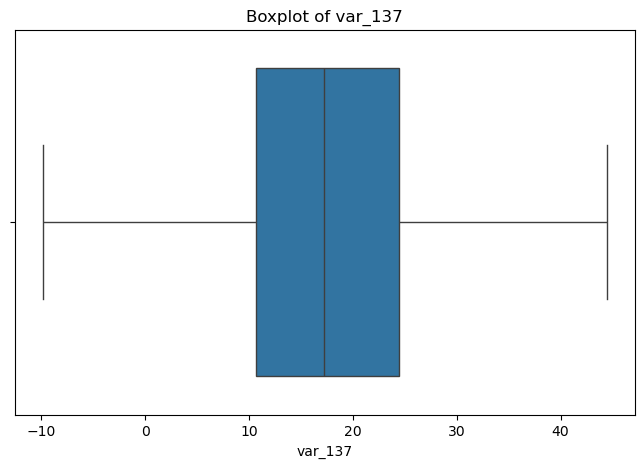

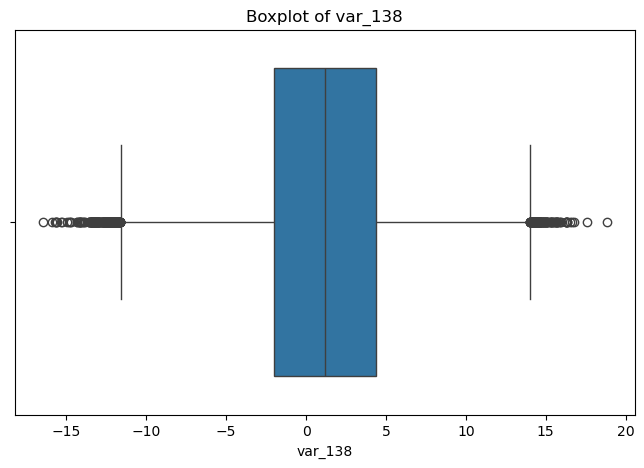

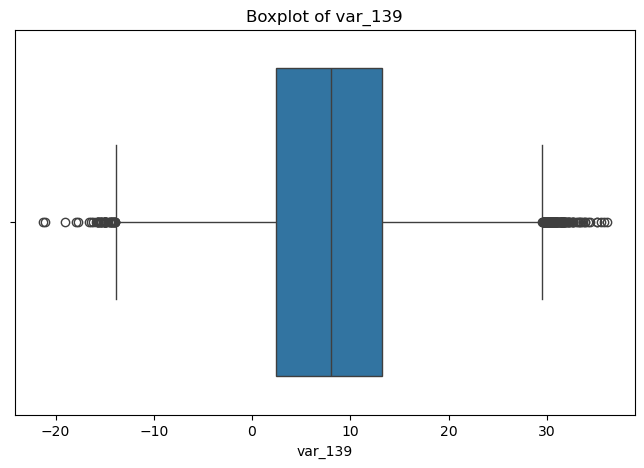

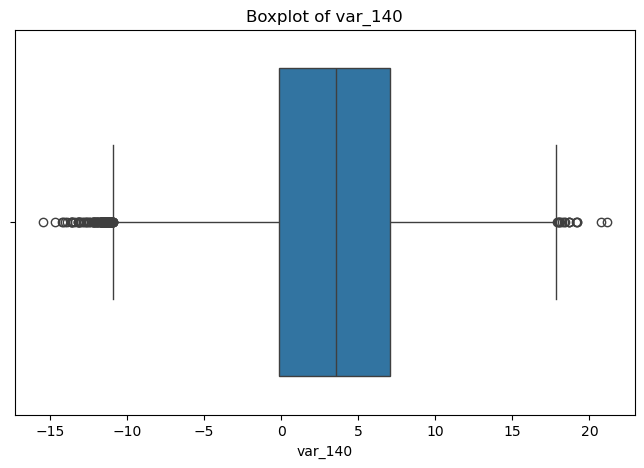

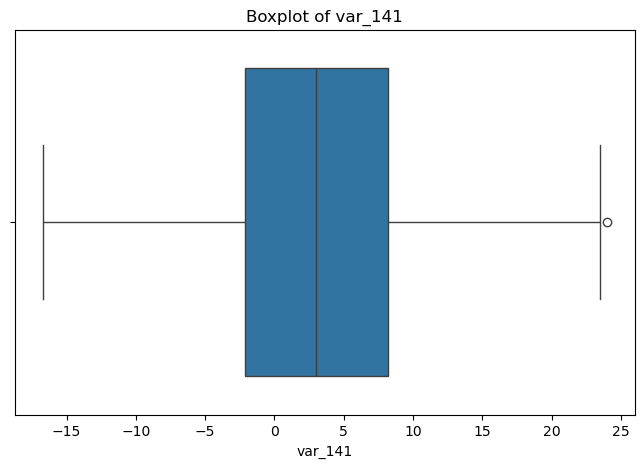

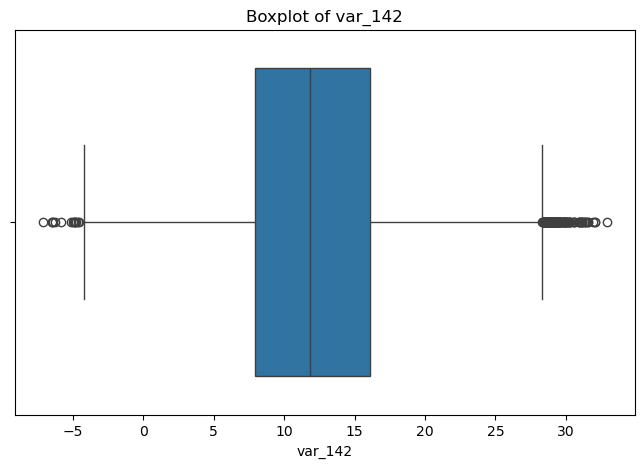

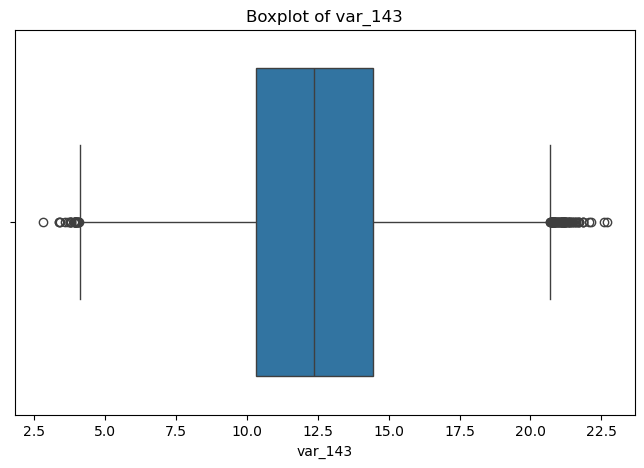

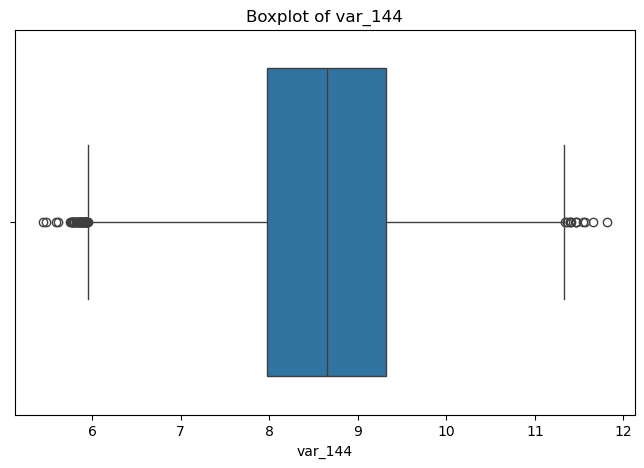

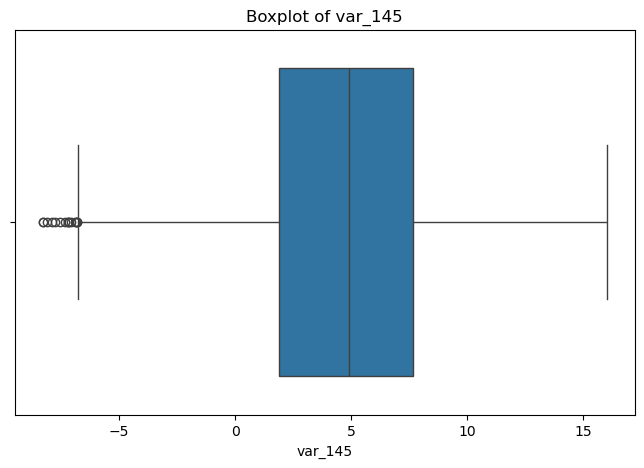

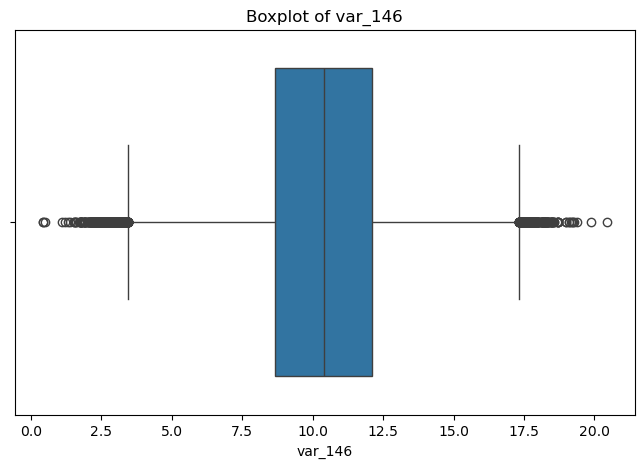

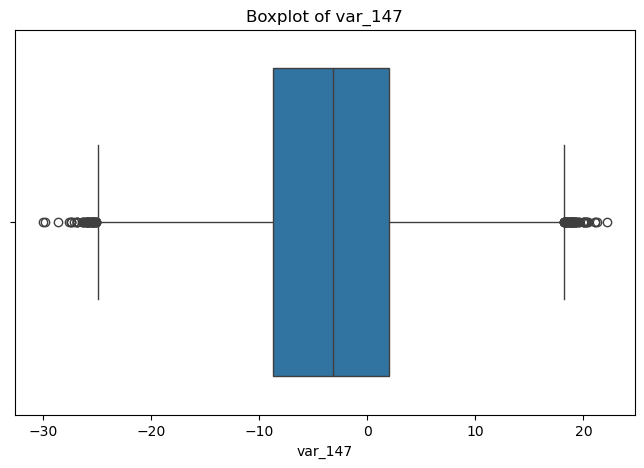

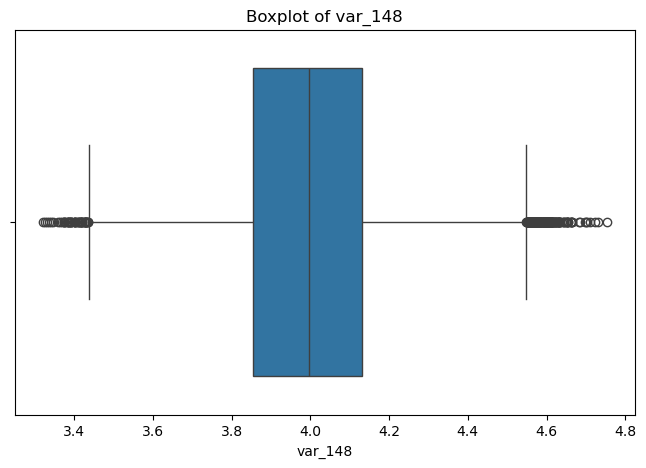

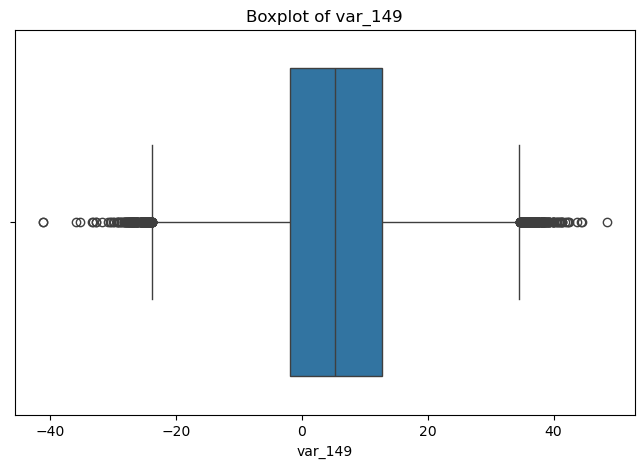

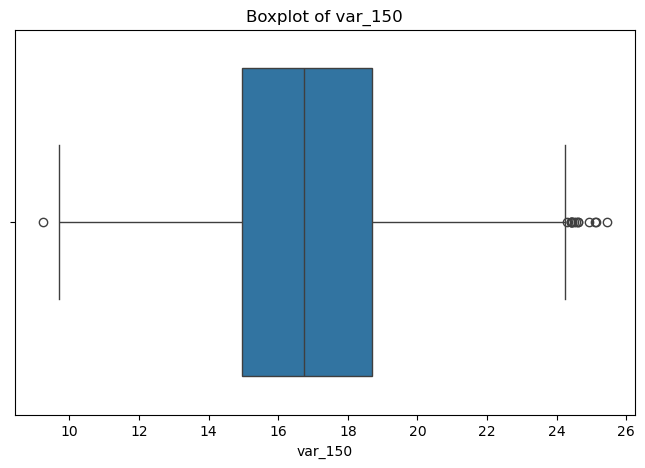

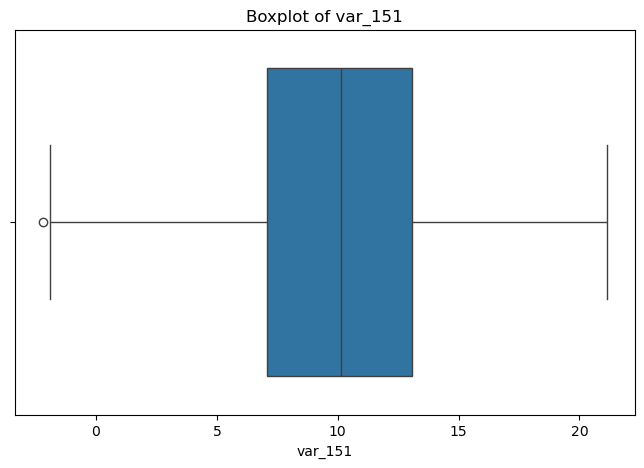

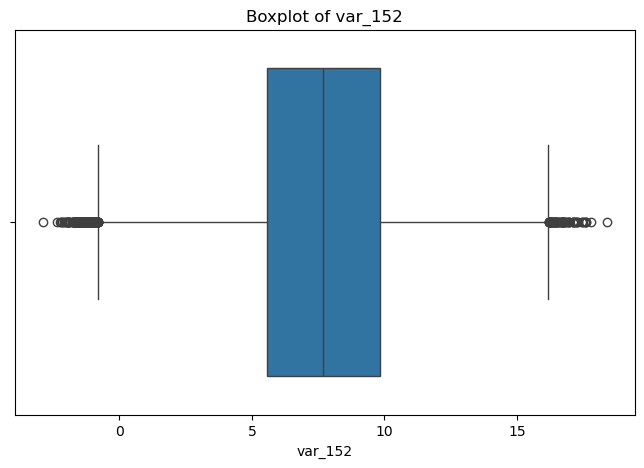

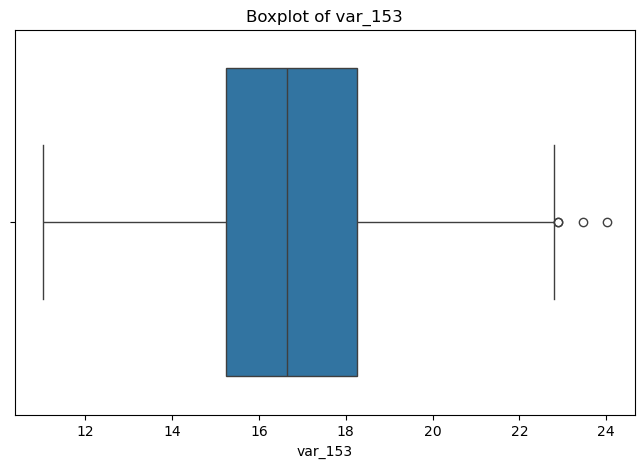

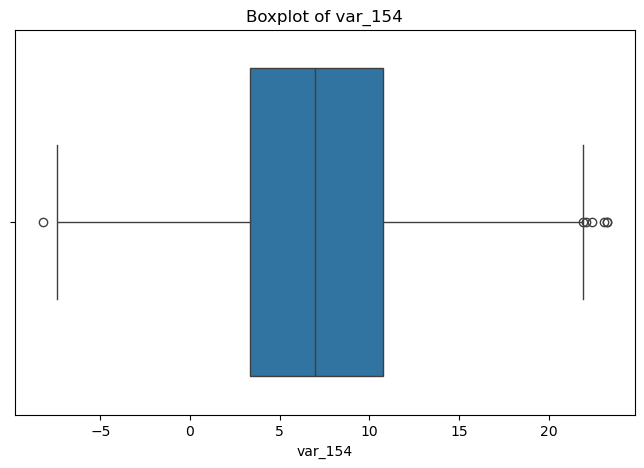

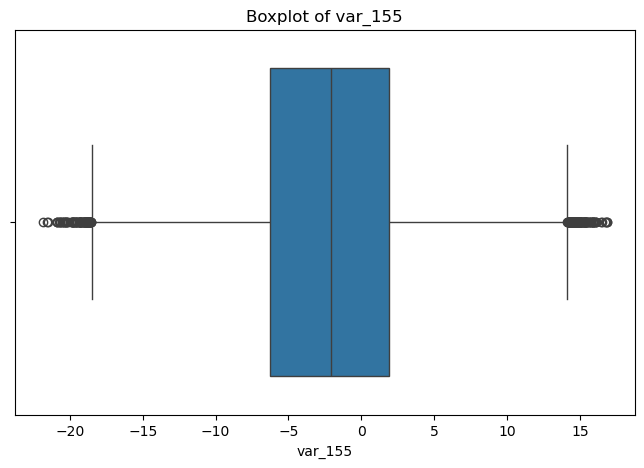

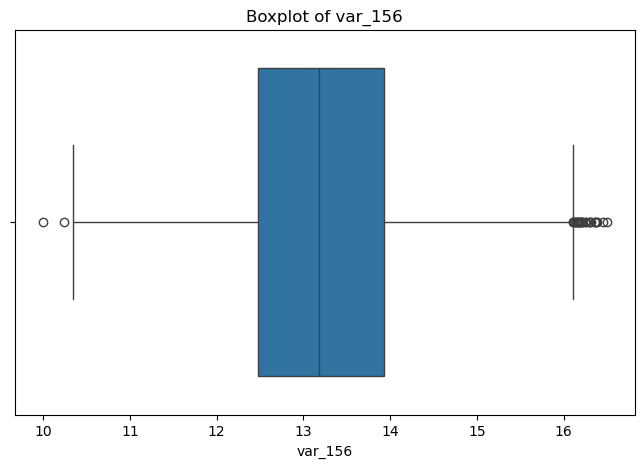

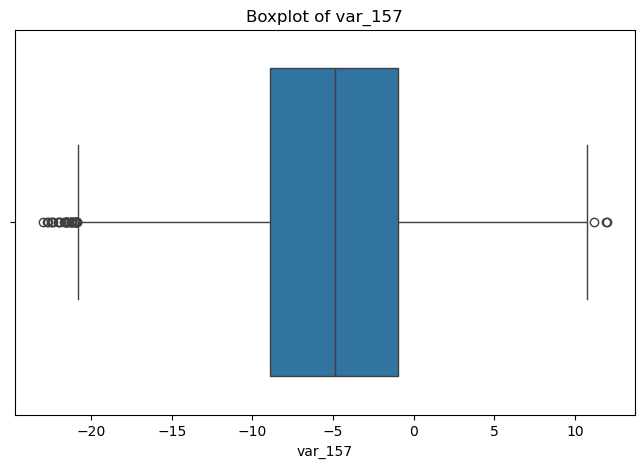

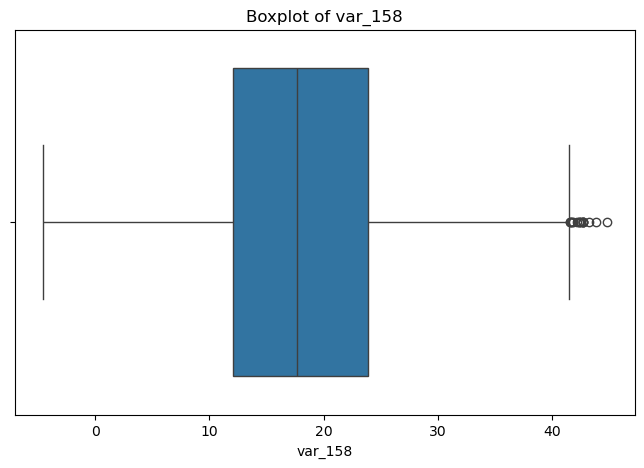

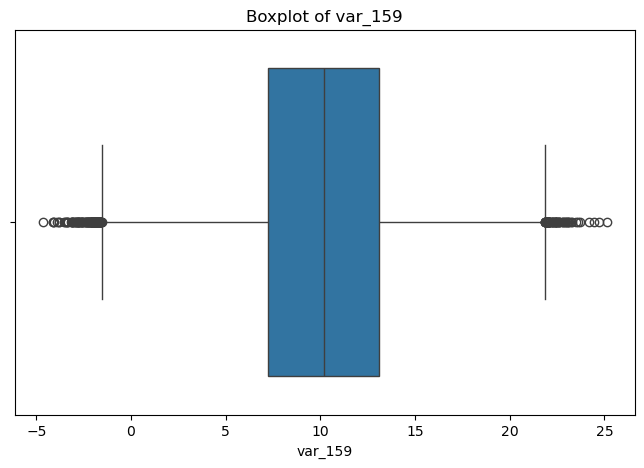

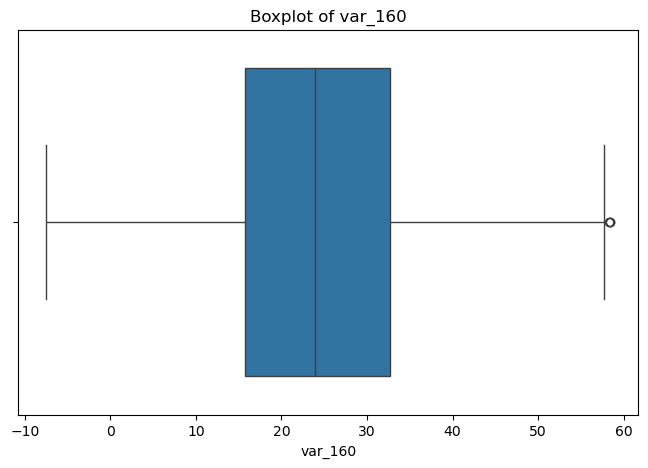

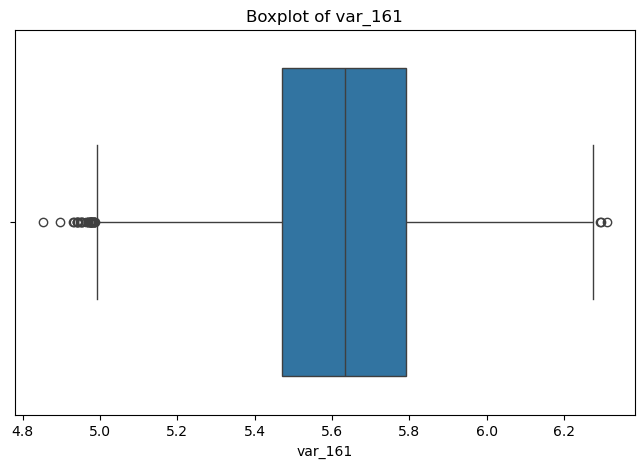

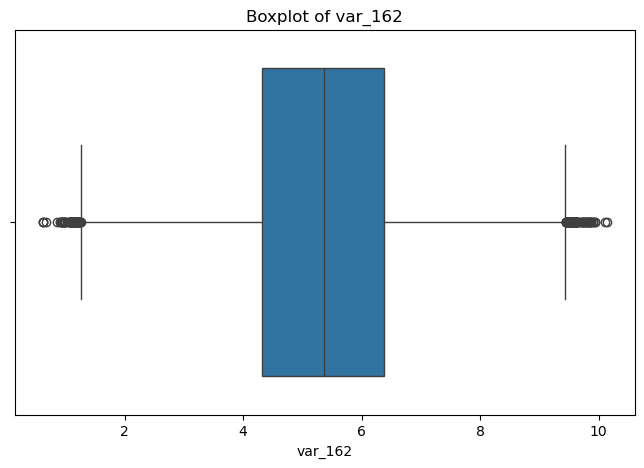

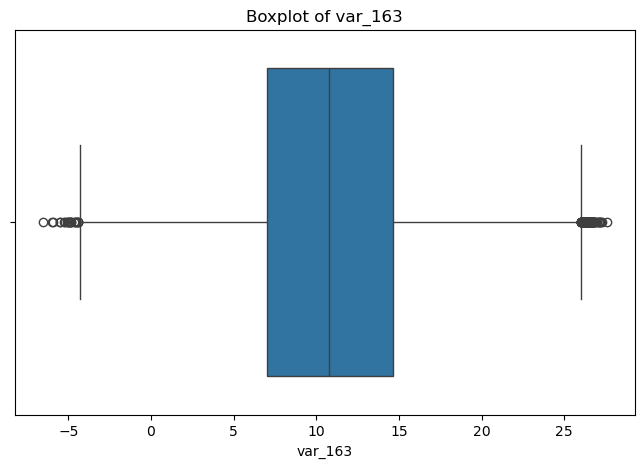

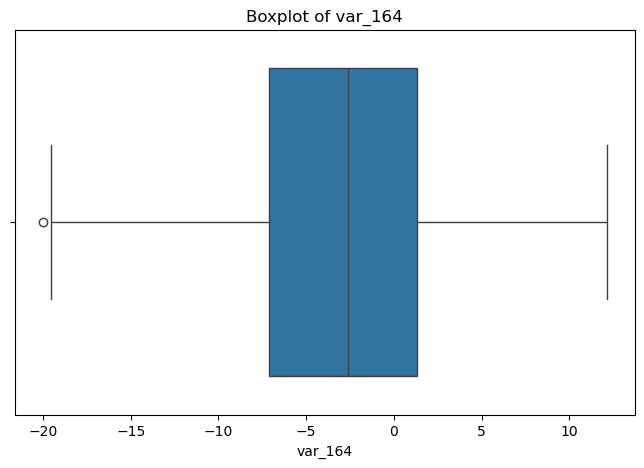

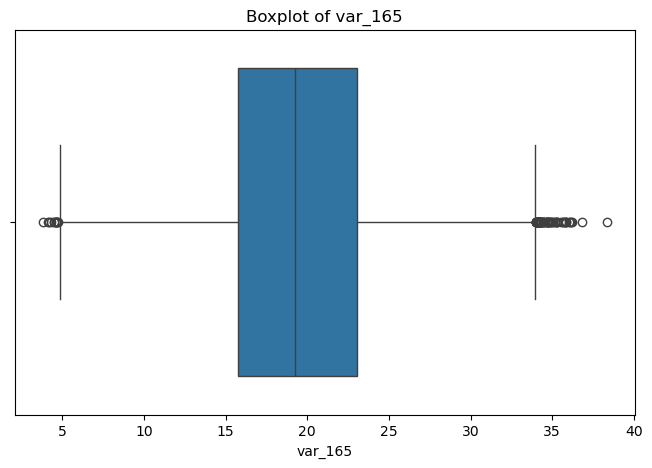

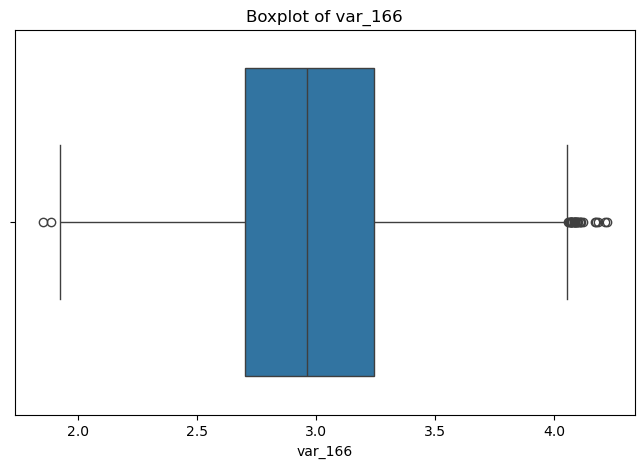

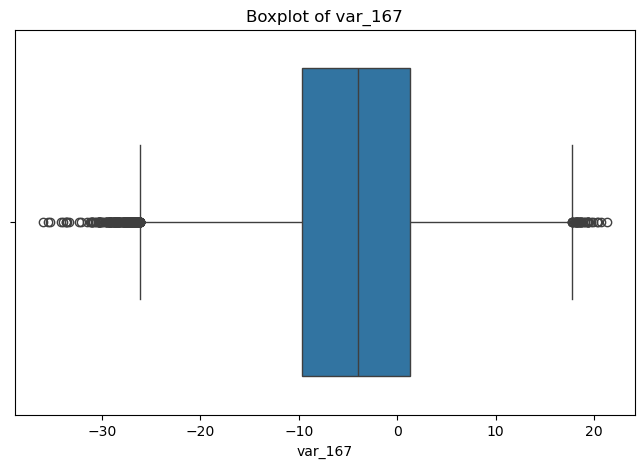

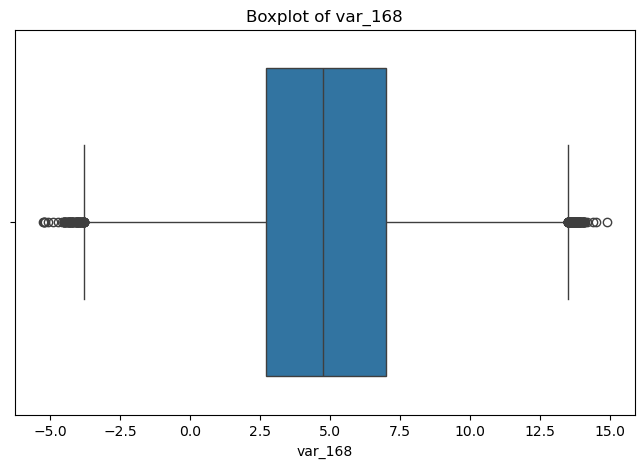

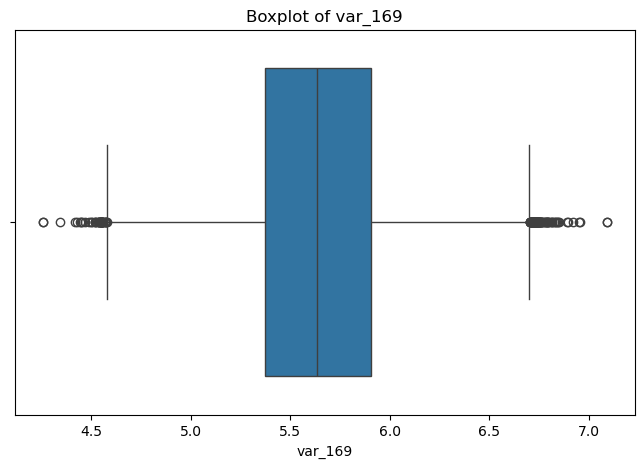

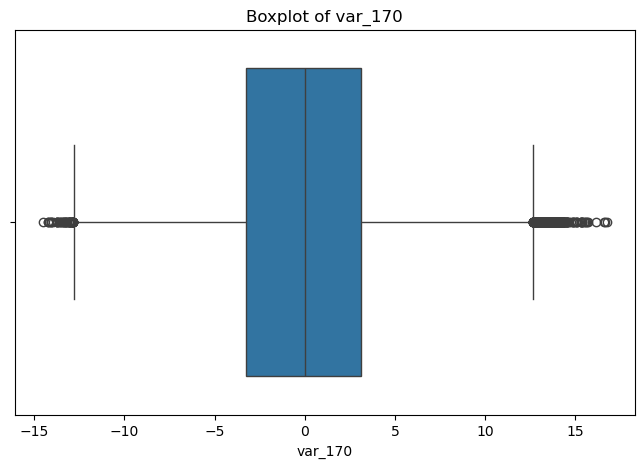

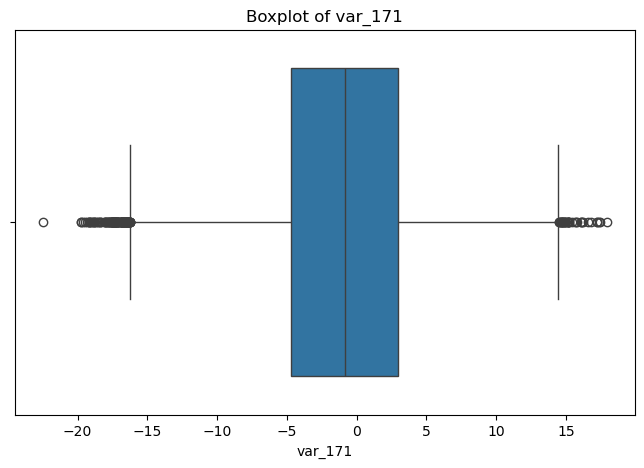

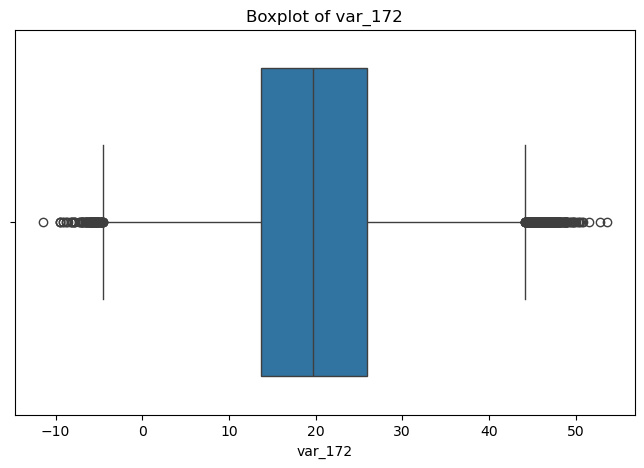

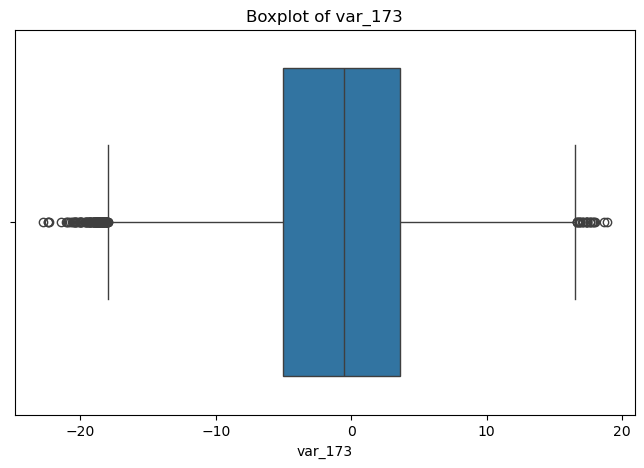

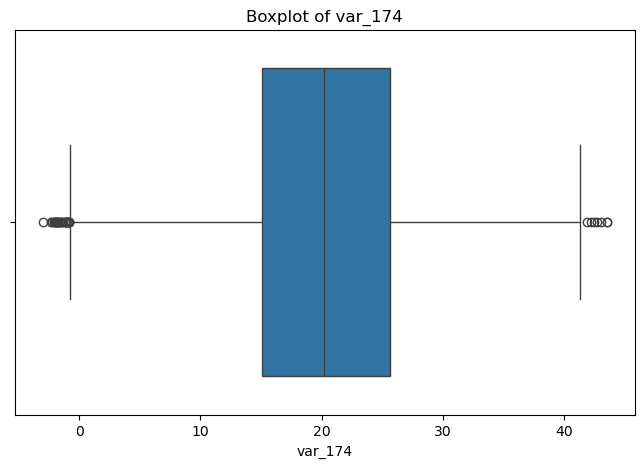

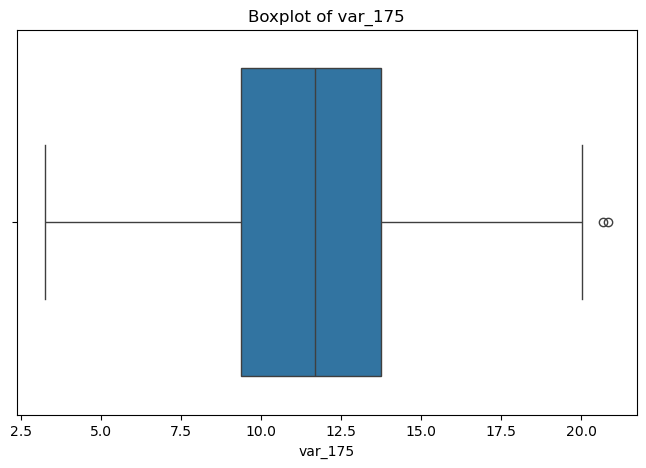

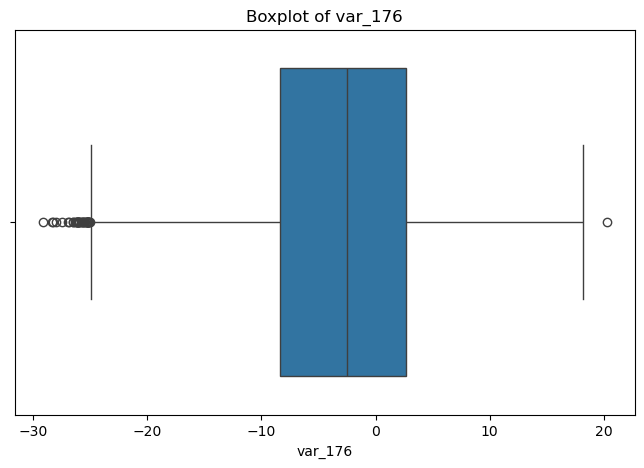

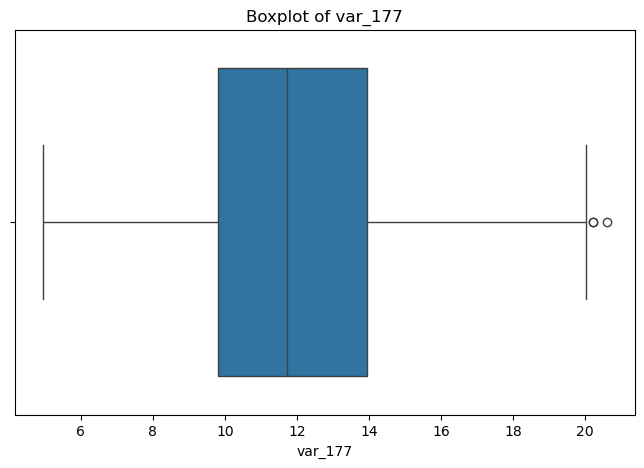

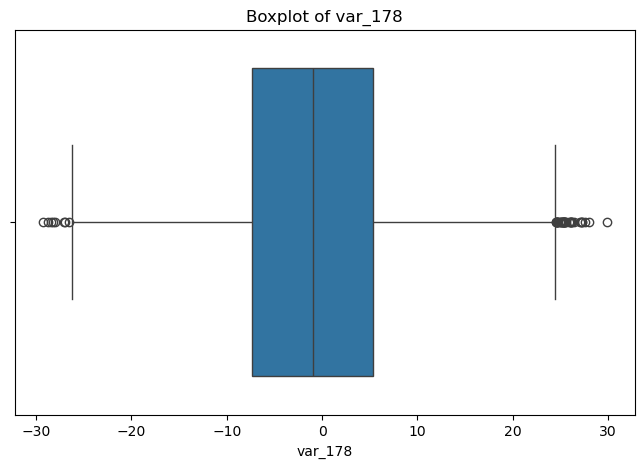

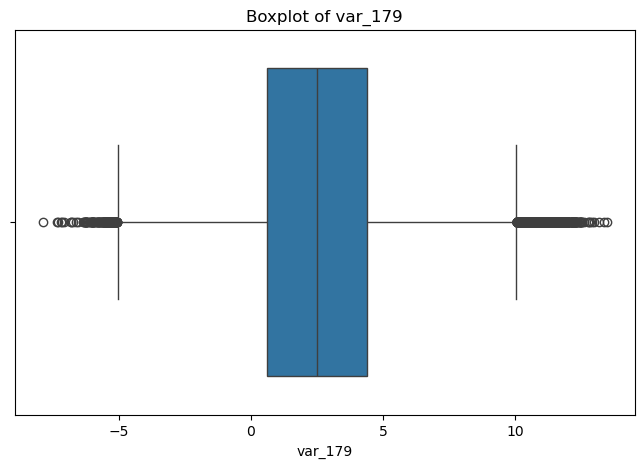

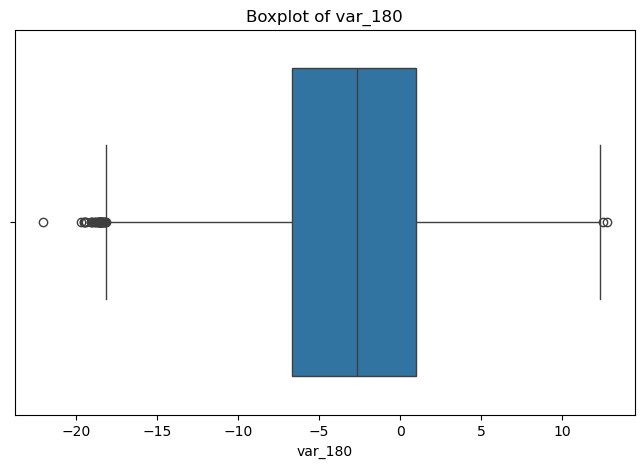

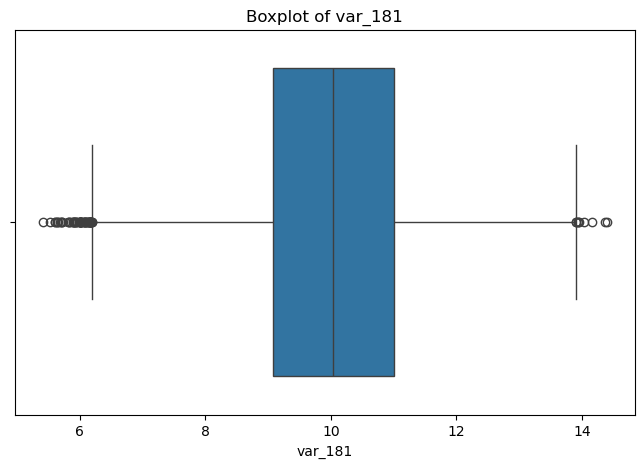

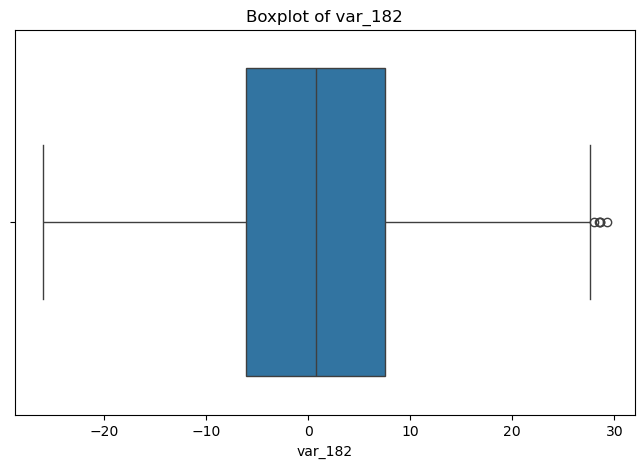

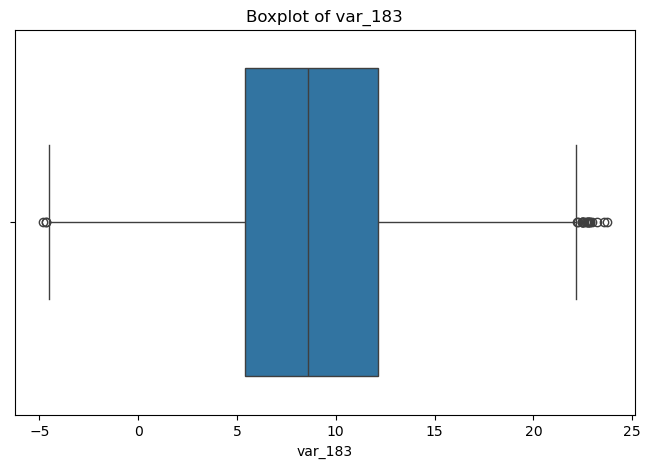

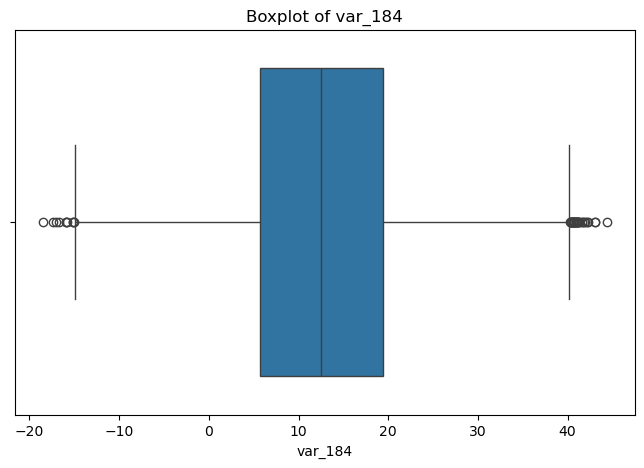

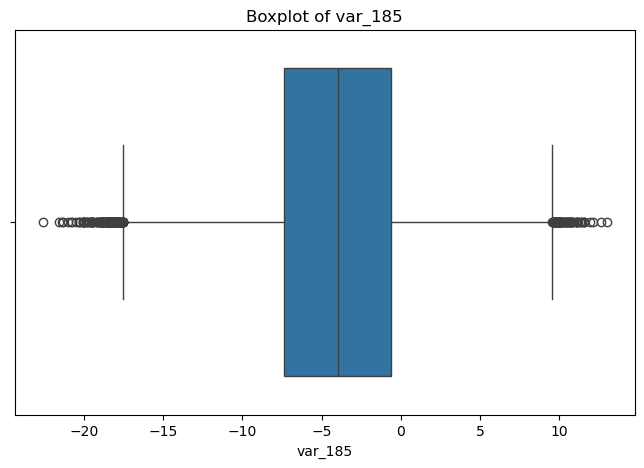

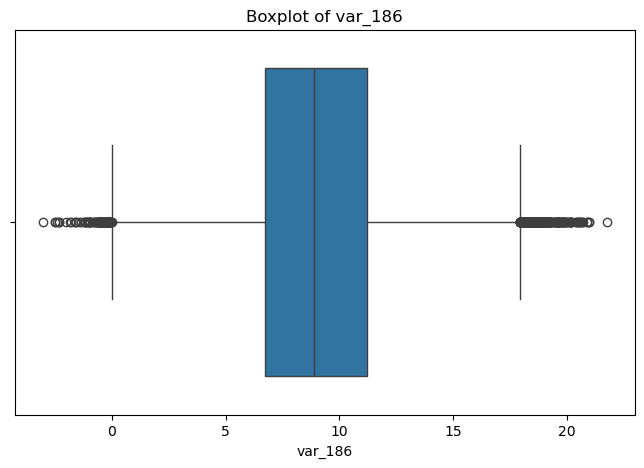

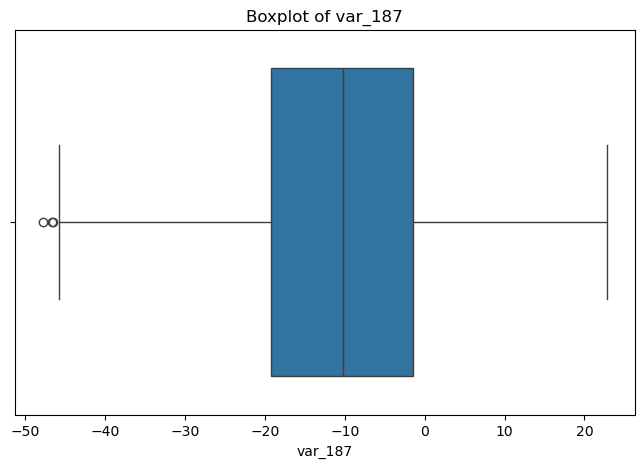

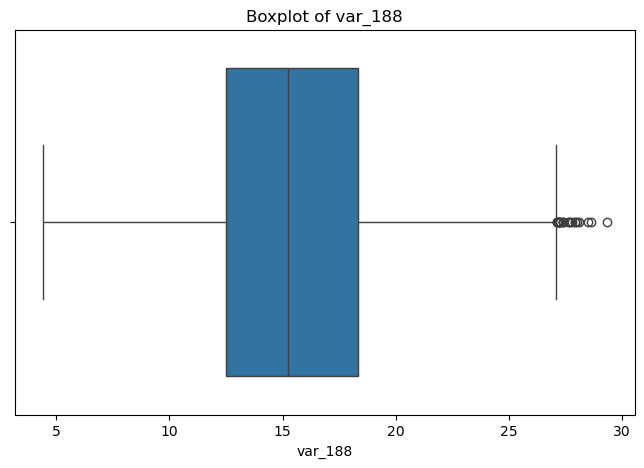

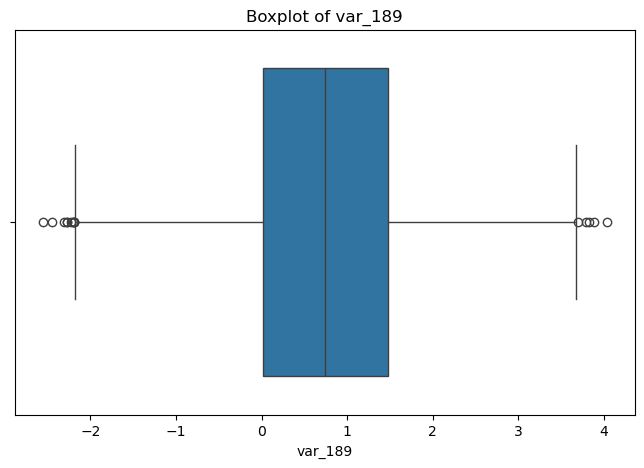

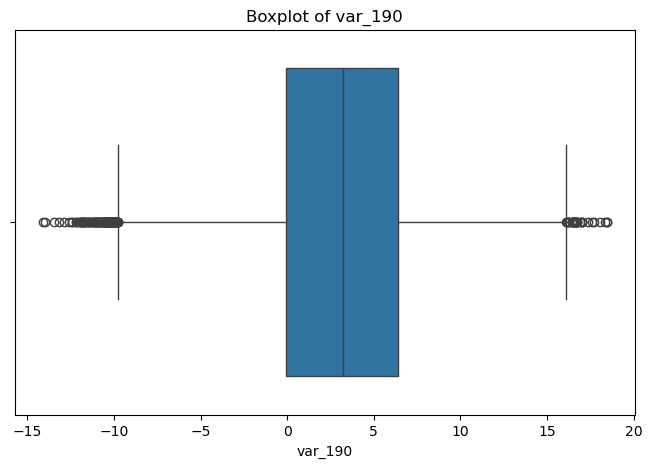

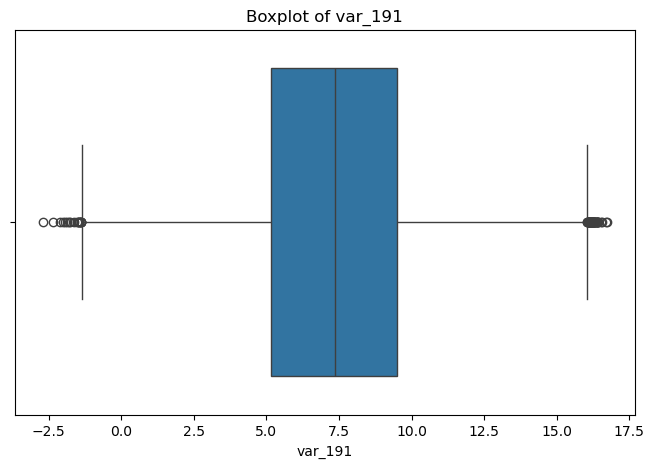

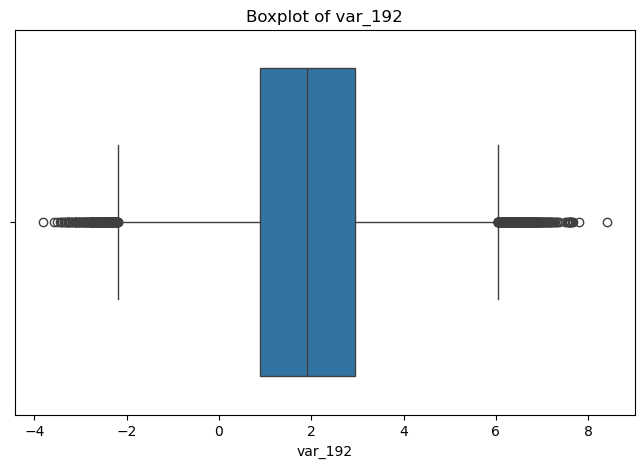

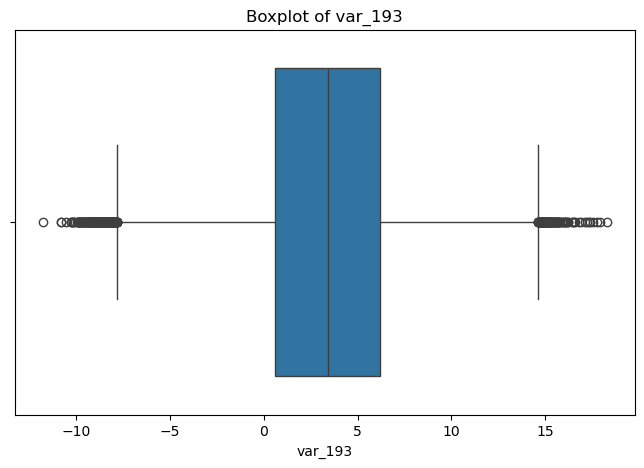

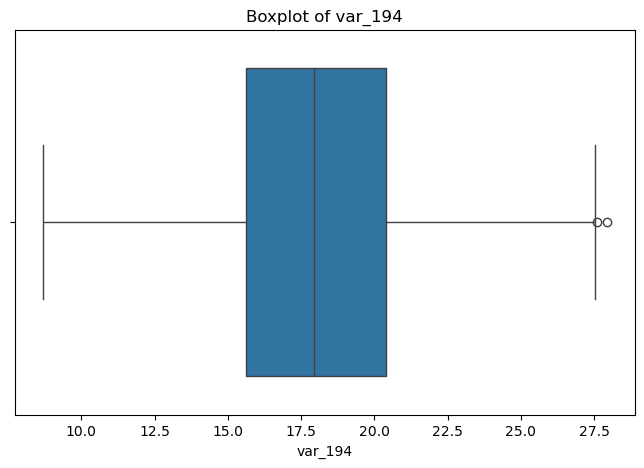

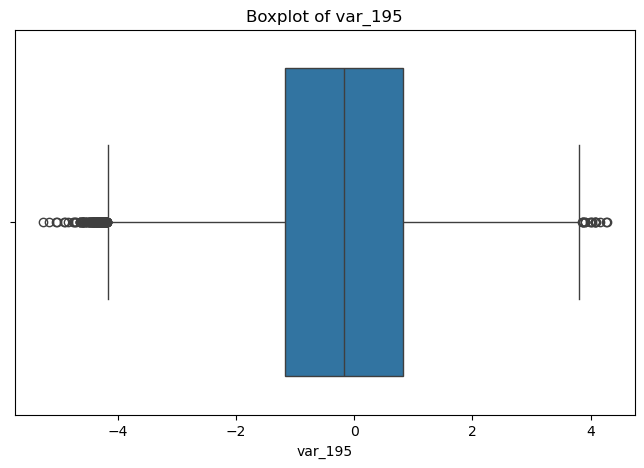

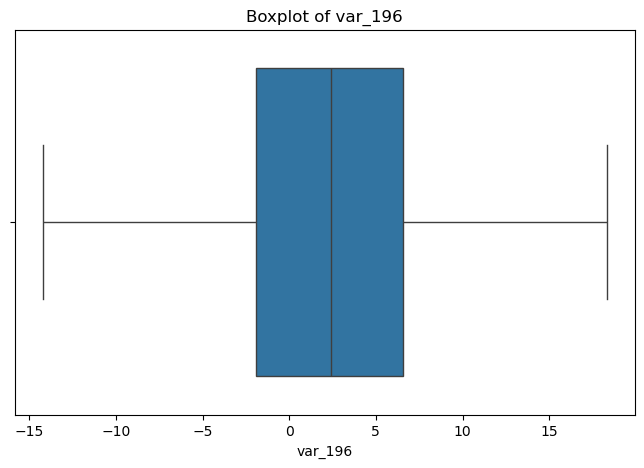

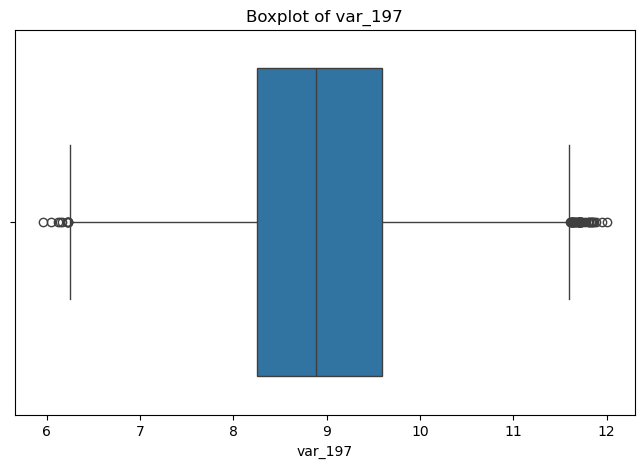

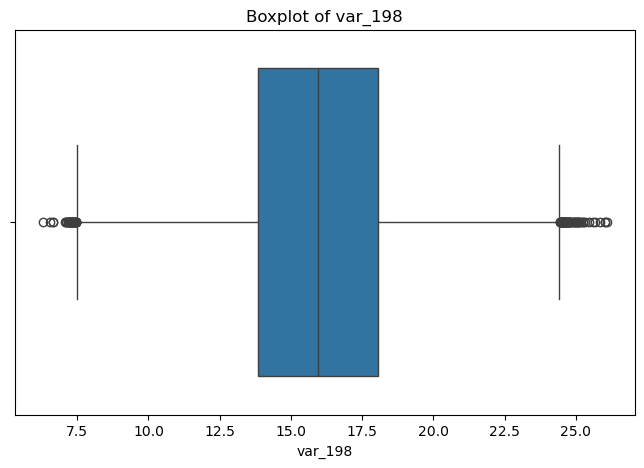

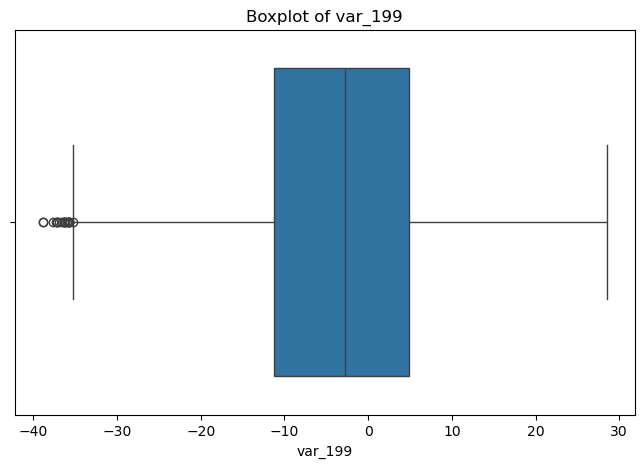

In [9]:
# Load the dataset
file_path = 'train(1).csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Select numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Create boxplots to detect outliers
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

In [16]:
# Load the dataset
file_path = 'train(1).csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Select numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
numerical_data = data[numerical_columns]

# Function to identify outliers using IQR method
def find_outliers_iqr(data):
    outliers = {}
    for column in data.columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Detect outliers in numerical columns
outliers = find_outliers_iqr(numerical_data)

# Print outliers for each column
for column, outlier_data in outliers.items():
    print(f"Outliers in {column}:")
    print(outlier_data)
    print()

# If you want to see the number of outliers for each column
for column, outlier_data in outliers.items():
    print(f"{column} has {len(outlier_data)} outliers.")


Outliers in target:
        target    var_0   var_1    var_2   var_3    var_4    var_5   var_6  \
13           1  16.3699  1.5934  16.7395  7.3330  12.1450   5.9004  4.8222   
29           1   5.3301 -2.6064  13.1913  3.1193   6.6483  -6.5659  5.9064   
63           1   7.7072  0.0183   9.9974  8.3524   9.2886 -13.3627  6.0425   
65           1  10.5358 -2.5439   8.7394  6.7548  14.4099  -3.8724  5.1584   
71           1   6.7547  2.5973  14.2141  8.3514   7.4942  -1.3055  4.2336   
...        ...      ...     ...      ...     ...      ...      ...     ...   
199966       1  13.5797  2.5526   6.0512  5.2730  12.2182  -3.4048  7.3623   
199976       1   7.9663 -2.8485   9.0919  7.3298   9.6690 -16.7872  4.5094   
199981       1  12.8140  0.6386  14.1657  7.1044   8.9365  -0.3274  6.5949   
199986       1  12.0298 -8.7800   7.7071  7.4015   9.2305 -16.2174  5.9064   
199990       1  14.1475  1.8568  11.0066  3.6779  12.1944 -16.5936  5.3217   

          var_7   var_8  ...  var_190  var_

In [18]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'train(1).csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Select numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate IQR and remove outliers for all numerical columns
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Remove rows where any column's value is outside the 1.5*IQR range
data_cleaned = data[~((data[numerical_columns] < (Q1 - 1.5 * IQR)) | (data[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Rows removed based on IQR method. Data shape after cleaning: {data_cleaned.shape}")


Rows removed based on IQR method. Data shape after cleaning: (157999, 202)


####  Why We Use Heatmaps:
Quickly understand correlations: Visualizes relationships between variables, identifying strong or weak correlations.
Spot multicollinearity: Helps identify redundant features that might cause problems in modeling.
Simplify complex data: Provides a compact, visual summary that is easier to interpret.
Detect trends and anomalies: Helps uncover patterns, trends, or unusual values in the data.
Enhanced communication: Makes it easier to present data to both technical and non-technical stakeholders.
Cluster patterns: Useful for visualizing groups of similar data points or features.
Effective for EDA: Helps guide the data exploration phase, enabling better decisions for feature selection, transformation, and model building.##
#### Common Use Cases for Heatmaps:
Correlation matrices to visualize feature relationships.
Confusion matrices in classification problems.
Clustered patterns in data (like customer segmentation).
Feature importance heatmaps after training machine learning models.

## HeatMap

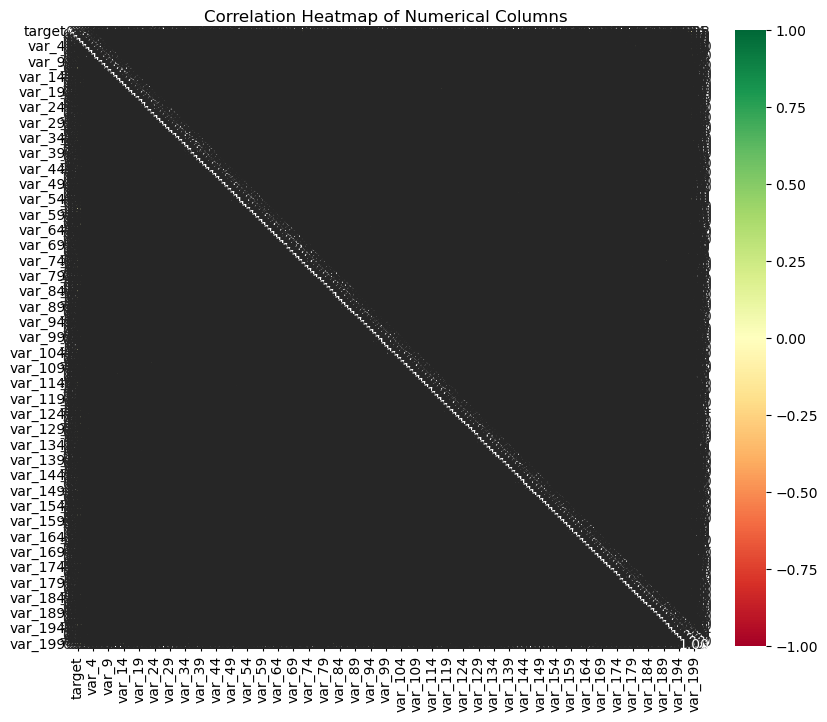

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'train(1).csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Select numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix for only numerical columns
correlation_matrix = data[numerical_columns].corr()

# Generate a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()


## Model Evalution 

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Model Training and Splitting the data

In [22]:
X = data.drop('target',axis=1)  # Features
y = data.target  # Target variable

In [23]:
# Handle categorical columns (encode them)
categorical_columns = X.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for column in categorical_columns:
    X[column] = label_encoder.fit_transform(X[column])

# Handle missing values (if any) - here filling with mean for numerical columns
X = X.fillna(X.mean())

In [24]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Why Logistic Regression for this Dataset?
Logistic regression is suitable for this dataset under the following circumstances:

Binary or Multi-Class Classification: If the target variable in your dataset is categorical (for example, "0" or "1", or a set of distinct classes), logistic regression is an effective choice.
Interpretability: Logistic regression provides coefficients that can be interpreted easily. You can assess the impact of each feature on the likelihood of the target variable.
Probabilistic Output: Since logistic regression outputs probabilities, it is helpful when you need to make decisions based on the likelihood of an event happening, such as classifying whether a loan will be approved or not.

## Model Building

In [25]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()#obj creation
model.fit(X_train,y_train)

LogisticRegression()

Training: Logistic regression models are trained on the dataset by learning the optimal weights for each feature using techniques like gradient descent. The goal is to minimize the log loss or cross-entropy error during training.

In [26]:
X_train

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
153248,59168,12.3039,-8.3899,9.1944,8.0649,9.0247,-1.9559,5.1565,21.1631,2.7437,...,5.5185,7.9504,0.9184,5.9945,11.0078,-1.0936,-2.3412,8.1712,12.9046,-1.9309
67802,164227,15.4069,2.7820,9.2951,7.1997,8.5359,-4.5422,5.4210,9.9651,4.0623,...,3.0063,5.6555,2.1527,1.3518,15.4728,0.2686,6.5523,8.4698,22.0454,1.4756
148889,54323,9.6427,-4.6261,6.9610,5.4054,12.0859,-11.2917,4.5290,13.8605,-0.8366,...,3.4351,9.1779,1.5004,1.9895,20.4072,-0.1118,0.5692,9.3290,12.8980,-9.4318
103093,3441,9.6881,-5.6696,11.2709,8.2812,13.9232,-16.1434,4.9664,20.1092,-5.9868,...,-4.9494,9.2727,1.1371,3.7435,20.6906,1.3752,7.4442,9.2145,18.2777,-2.5865
104681,5205,7.1128,-2.0830,11.4807,8.3033,10.6180,-6.4743,5.0078,21.0212,-4.9779,...,7.3583,8.1992,1.3436,8.8929,21.6711,-2.0557,6.4975,8.3110,13.7728,-5.9028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,22090,11.4356,2.1235,9.6502,8.3973,12.7467,-21.6719,4.8715,11.5484,5.1568,...,-0.8857,5.5809,3.3083,4.6437,18.9889,-1.1895,1.4323,8.9283,14.2385,6.9994
103694,4108,9.0806,-0.4575,12.2323,5.4625,9.9592,-15.0923,4.0602,13.8138,1.3653,...,1.0106,8.3910,1.2103,5.0491,22.0054,-0.9007,4.7159,8.1368,14.0836,0.9827
131932,35484,16.7760,1.0075,10.2312,8.4240,9.3894,3.9643,5.2315,13.3170,-3.1602,...,7.5501,8.9941,2.6530,1.5596,17.4303,2.4686,5.8723,7.9628,13.4127,-10.6949
146867,52077,9.9775,7.4480,12.9018,8.9272,9.7036,-11.1443,3.1534,20.6615,4.4957,...,12.4350,7.0073,0.9529,5.8906,19.7015,-1.3745,-3.8948,8.0624,21.3589,-2.6861


In [27]:
y_test

119737    0
72272     0
158154    0
65426     0
30074     1
         ..
4174      0
91537     0
156449    1
184376    1
6584      1
Name: target, Length: 40000, dtype: int64

In [28]:
# Predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

#### Evaluation:
After training, the model is evaluated using various metrics like accuracy, precision, recall, F1-score, and AUC-ROC to assess how well it is predicting the target variable. Evaluation metrics help understand how the model performs in different scenarios and whether it can generalize to new data.



In [29]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9029


#### Error Methods: 
The error metrics guide the model’s optimization process by penalizing incorrect predictions. In logistic regression, the most commonly used error metric is log loss, but metrics like accuracy, precision, and recall are also used to interpret the model’s effectiveness in real-world applications.

In [30]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[35681   222]
 [ 3661   436]]


In [31]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     35903
           1       0.66      0.11      0.18      4097

    accuracy                           0.90     40000
   macro avg       0.78      0.55      0.57     40000
weighted avg       0.88      0.90      0.87     40000



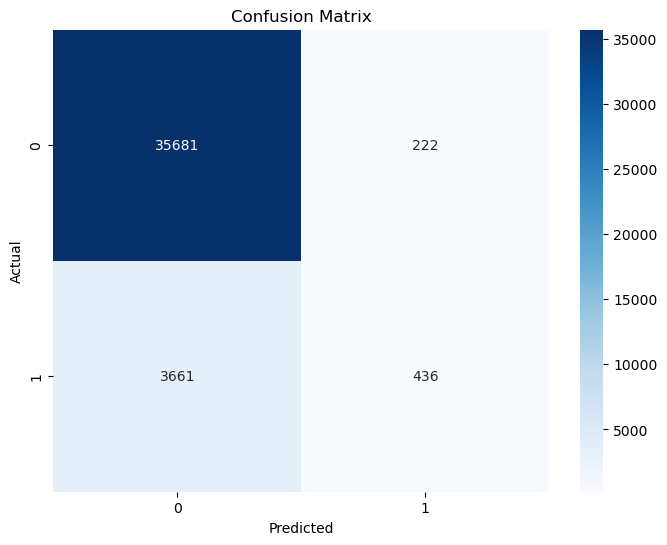

In [32]:
# Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()